<a href="https://colab.research.google.com/github/raj-dandangi/ds_dandangi_raj-PrimeTradeAI-/blob/main/ds_assignment_notebook_3(Primetrade_aI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understand the Assignment
explore and analyze the relationship between trader behavior and market
sentiment using two key datasets. <br>

---

# Objective
Analyze how trading behavior (profitability, risk, volume, leverage) aligns or diverges from
overall market sentiment (fear vs greed). Identify hidden trends or signals that could influence  smarter trading strategies.

---

<br>1.
Goal: Analyze the relationship between trader behavior (from Hyperliquid data) and Bitcoin market sentiment (Fear & Greed Index). <br>
2.
Focus Areas: Profitability, risk, trading volume, leverage in relation to market sentiment (Fear vs. Greed). <br>
3.
Outcome: Identify trends or signals for smarter trading strategies.

# IMPORTING DATA SETS AND MERGING

In [ ]:
#importing as a pandas data-sets from path  /content/drive/MyDrive/Primetrade.ai(knit.finance)-ds-assignment/ds_(dandangiRaj_dandangirajda@gmail.com)/output_Files/pandas-dataframe-csv-files/df_historical_data.csv and /content/drive/MyDrive/Primetrade.ai(knit.finance)-ds-assignment/ds_(dandangiRaj_dandangirajda@gmail.com)/output_Files/pandas-dataframe-csv-files/df_fgi.csv

import pandas as pd

# Importing as a pandas data-sets from path
df_fgi = pd.read_csv("/content/drive/MyDrive/Primetrade.ai(knit.finance)-ds-assignment/ds_(dandangiRaj_dandangirajda@gmail.com)/output_Files/pandas-dataframe-csv-files/df_fgi.csv")
df_historical_data = pd.read_csv("/content/drive/MyDrive/Primetrade.ai(knit.finance)-ds-assignment/ds_(dandangiRaj_dandangirajda@gmail.com)/output_Files/pandas-dataframe-csv-files/df_historical_data.csv")

display(df_fgi.head())
display(df_historical_data.head())


,date,timestamp,value,classification,value_7day_avg,value_30day_avg,daily_change
0,2018-02-01,1517463000,30,Fear,NaN,NaN,NaN
1,2018-02-02,1517549400,15,Extreme Fear,NaN,NaN,-15.0
2,2018-02-03,1517635800,40,Fear,NaN,NaN,25.0
3,2018-02-04,1517722200,24,Extreme Fear,NaN,NaN,-16.0
4,2018-02-05,1517808600,11,Extreme Fear,NaN,NaN,-13.0


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Expected_Fee,Fee_Discrepancy,Discrepancy_Percent,timestampfix,Execution_Price_boxcox,Size_USD_log,Start_Position_yeojohnson,Fee_sqrt,Size_Tokens_log10,Closed_PnL_yeojohnson
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,2.755256,2.409852,87.463797,2024-10-27 03:33:20,1.955020,3.896094,0.000000,0.587711,2.994260,0.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,0.044688,0.039088,87.468672,2024-10-27 03:33:20,1.955364,2.106123,1196.930422,0.074833,1.204120,0.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,0.402720,0.352289,87.477320,2024-10-27 03:33:20,1.955974,3.060936,1216.971281,0.224569,2.158634,0.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,0.399714,0.349671,87.480313,2024-10-27 03:33:20,1.956184,3.057681,1397.903946,0.223703,2.155275,0.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,0.024413,0.021357,87.484199,2024-10-27 03:33:20,1.956406,1.843544,1578.179844,0.055276,0.941014,0.0


In [ ]:
# Convert date columns to datetime objects and extract date
df_fgi['date'] = pd.to_datetime(df_fgi['date'])
df_historical_data['Timestamp IST'] = pd.to_datetime(df_historical_data['Timestamp IST'])
df_historical_data['date'] = pd.to_datetime(df_historical_data['Timestamp IST'].dt.date)

display(df_fgi.head())
display(df_historical_data.head())

,date,timestamp,value,classification,value_7day_avg,value_30day_avg,daily_change
0,2018-02-01,1517463000,30,Fear,NaN,NaN,NaN
1,2018-02-02,1517549400,15,Extreme Fear,NaN,NaN,-15.0
2,2018-02-03,1517635800,40,Fear,NaN,NaN,25.0
3,2018-02-04,1517722200,24,Extreme Fear,NaN,NaN,-16.0
4,2018-02-05,1517808600,11,Extreme Fear,NaN,NaN,-13.0


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Fee_Discrepancy,Discrepancy_Percent,timestampfix,Execution_Price_boxcox,Size_USD_log,Start_Position_yeojohnson,Fee_sqrt,Size_Tokens_log10,Closed_PnL_yeojohnson,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,2.409852,87.463797,2024-10-27 03:33:20,1.955020,3.896094,0.000000,0.587711,2.994260,0.0,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,0.039088,87.468672,2024-10-27 03:33:20,1.955364,2.106123,1196.930422,0.074833,1.204120,0.0,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,0.352289,87.477320,2024-10-27 03:33:20,1.955974,3.060936,1216.971281,0.224569,2.158634,0.0,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,0.349671,87.480313,2024-10-27 03:33:20,1.956184,3.057681,1397.903946,0.223703,2.155275,0.0,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,0.021357,87.484199,2024-10-27 03:33:20,1.956406,1.843544,1578.179844,0.055276,0.941014,0.0,2024-12-02


In [ ]:
df_merged = pd.merge(df_historical_data, df_fgi, on='date', how='inner')
display(df_merged.head())
display(df_merged.shape)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Fee_sqrt,Size_Tokens_log10,Closed_PnL_yeojohnson,date,timestamp,value,classification,value_7day_avg,value_30day_avg,daily_change
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,0.587711,2.994260,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,0.074833,1.204120,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,0.224569,2.158634,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,0.223703,2.155275,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,0.055276,0.941014,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0


(211218, 34)

In [ ]:
df_merged.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Fixed_Trade_ID', 'Expected_Fee', 'Fee_Discrepancy',
       'Discrepancy_Percent', 'timestampfix', 'Execution_Price_boxcox',
       'Size_USD_log', 'Start_Position_yeojohnson', 'Fee_sqrt',
       'Size_Tokens_log10', 'Closed_PnL_yeojohnson', 'date', 'timestamp',
       'value', 'classification', 'value_7day_avg', 'value_30day_avg',
       'daily_change'],
      dtype='object')>

# Answers
---

### 1. find relationship between trader behavior and market sentiment

## **for skewed values and raw data **

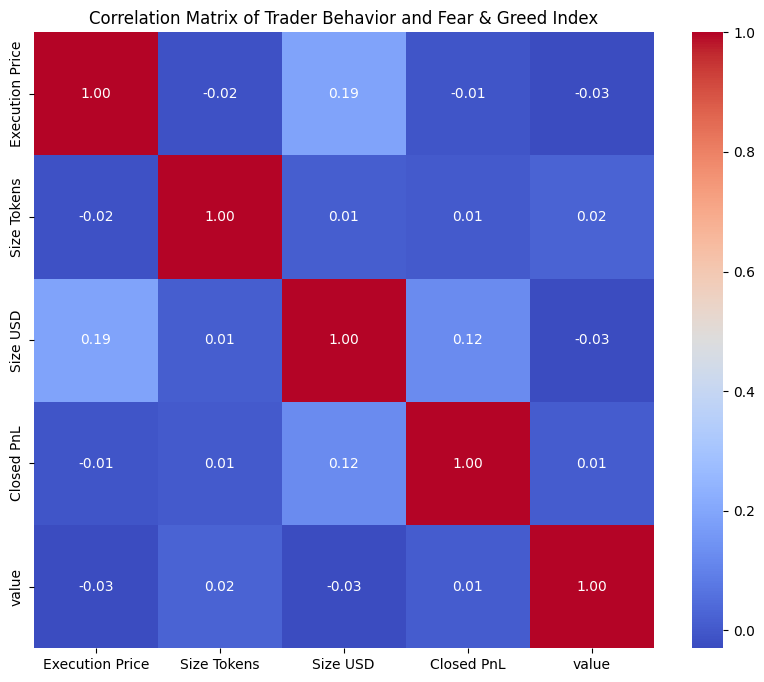

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numerical columns for correlation analysis
numerical_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL', 'value']
correlation_matrix = df_merged[numerical_cols].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Trader Behavior and Fear & Greed Index')
plt.show()

In [ ]:
# Group by 'classification' and calculate descriptive statistics for key metrics
grouped_stats_skwed = df_merged.groupby('classification')[['Closed PnL', 'Size USD', 'Size Tokens']].agg(['mean', 'median', 'std'])

# Display the descriptive statistics
display(grouped_stats_skwed)

Closed PnL                         Size USD           \
                     mean median          std         mean   median   
classification                                                        
Extreme Fear    34.537862    0.0  1136.056091  5349.731843  766.150   
Extreme Greed   67.892861    0.0   766.828294  3112.251565  500.050   
Fear            54.290400    0.0   935.355438  7816.109931  735.960   
Greed           42.743559    0.0  1116.028390  5736.884375  555.000   
Neutral         34.307718    0.0   517.122220  4782.732661  547.655   

                              Size Tokens                        
                         std         mean median            std  
classification                                                   
Extreme Fear    22306.826180  1675.893319  37.44   52956.092494  
Extreme Greed   11061.998403  8832.415746  42.64  159554.358234  
Fear            51914.859249  2992.641845  30.01   66991.214369  
Greed           30533.418602  4715.327756  30.30  114948.581317  
Neutral         37461.883466  4383.368714  25.02   85469.197541

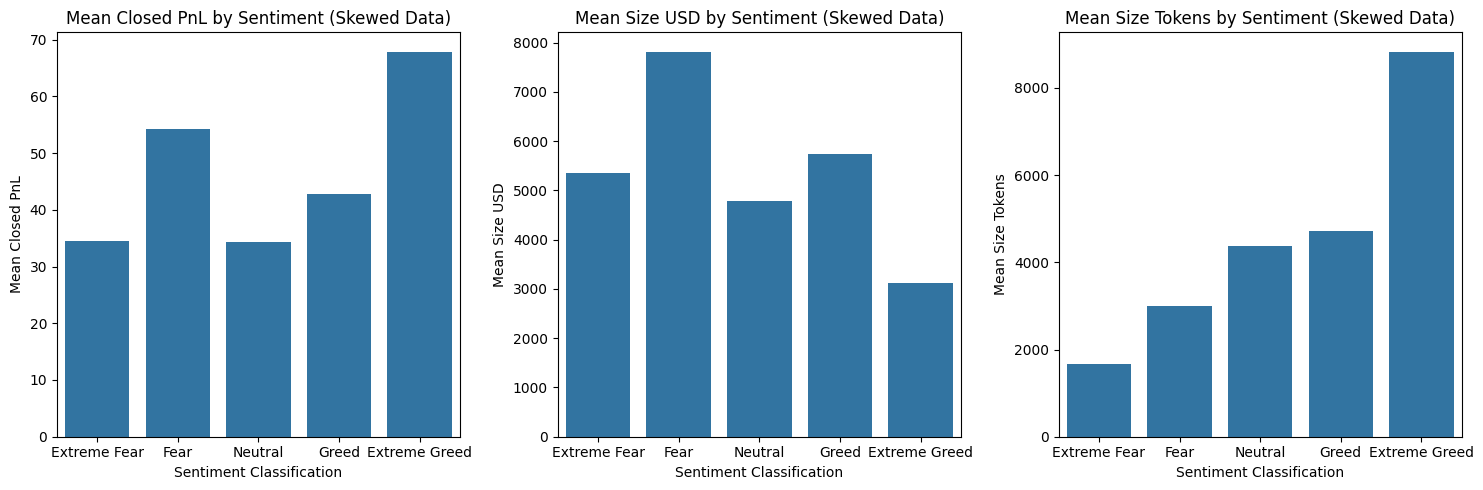

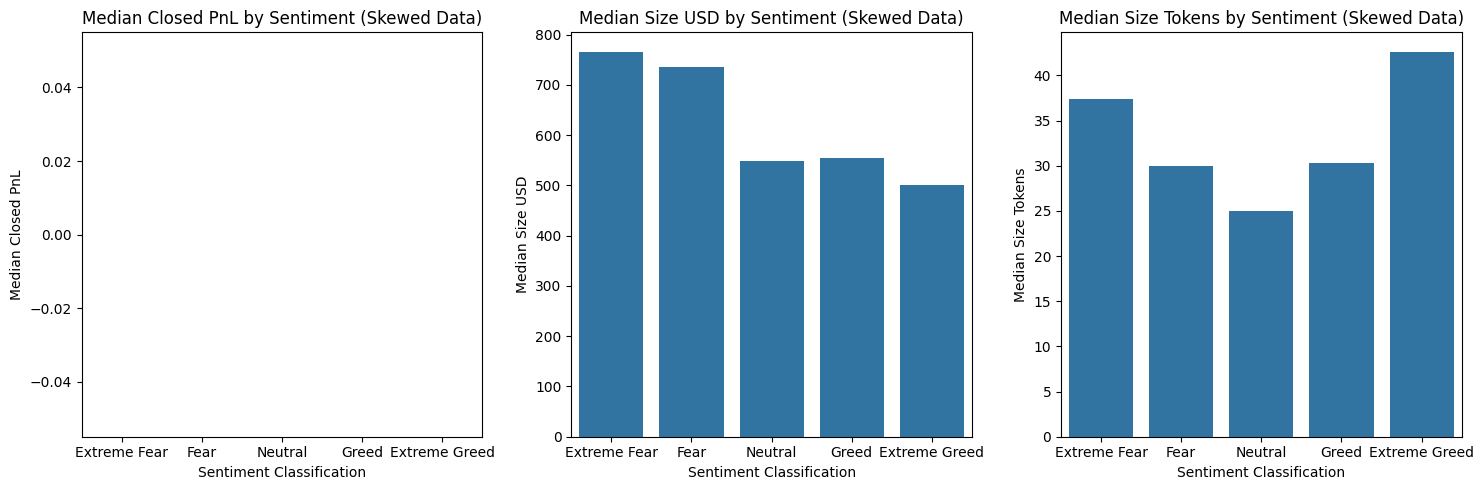

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index to use 'classification' as a column for plotting
grouped_stats_skwed_reset = grouped_stats_skwed.reset_index()

# Plotting the mean of metrics by classification
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='classification', y=('Closed PnL', 'mean'), data=grouped_stats_skwed_reset, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Mean Closed PnL by Sentiment (Skewed Data)')
plt.xlabel('Sentiment Classification')
plt.ylabel('Mean Closed PnL')

plt.subplot(1, 3, 2)
sns.barplot(x='classification', y=('Size USD', 'mean'), data=grouped_stats_skwed_reset, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Mean Size USD by Sentiment (Skewed Data)')
plt.xlabel('Sentiment Classification')
plt.ylabel('Mean Size USD')

plt.subplot(1, 3, 3)
sns.barplot(x='classification', y=('Size Tokens', 'mean'), data=grouped_stats_skwed_reset, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Mean Size Tokens by Sentiment (Skewed Data)')
plt.xlabel('Sentiment Classification')
plt.ylabel('Mean Size Tokens')

plt.tight_layout()
plt.show()

# Plotting the median of metrics by classification
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='classification', y=('Closed PnL', 'median'), data=grouped_stats_skwed_reset, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Median Closed PnL by Sentiment (Skewed Data)')
plt.xlabel('Sentiment Classification')
plt.ylabel('Median Closed PnL')

plt.subplot(1, 3, 2)
sns.barplot(x='classification', y=('Size USD', 'median'), data=grouped_stats_skwed_reset, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Median Size USD by Sentiment (Skewed Data)')
plt.xlabel('Sentiment Classification')
plt.ylabel('Median Size USD')


plt.subplot(1, 3, 3)
sns.barplot(x='classification', y=('Size Tokens', 'median'), data=grouped_stats_skwed_reset, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Median Size Tokens by Sentiment (Skewed Data)')
plt.xlabel('Sentiment Classification')
plt.ylabel('Median Size Tokens')

plt.tight_layout()
plt.show()


**Closed PnL (Profitability):**
* **Mean vs. Median Discrepancy:** The mean Closed PnL is highest in 'Extreme Greed' and 'Fear', suggesting potential for high average profits during these volatile periods. However, the median Closed PnL is consistently 0 across all sentiment categories.
* **Skewed Distribution:** The significant difference between mean and median indicates a highly skewed distribution, where a few large profitable trades heavily influence the mean, while the majority of individual trades are not profitable.

**Size USD and Size Tokens (Trading Volume):**
* **Mean Volume Variation:** Mean Size USD is highest in 'Fear' and 'Greed', while mean Size Tokens is highest in 'Extreme Greed'. This may reflect underlying asset price differences or varying trading activity.
* **Outlier Influence:** Similar to PnL, the median Size USD and Size Tokens show less variation than the means, suggesting that larger trades are influencing the average values.

**Potential Signals for Trading Strategies:**
* **Caution during Extreme Sentiment:** Despite higher mean PnL, the consistent zero median PnL in 'Extreme Greed' and 'Fear' indicates heightened risk and that profitability is driven by a small number of trades. Robust risk management is essential.
* **Volume as a Signal:** Variations in mean trade sizes across sentiment categories (e.g., larger trades during 'Fear') could indicate accumulation phases.
* **Importance of Median:** The consistent zero median PnL suggests that future strategy development should focus on identifying factors contributing to the few profitable outlier trades, rather than solely relying on sentiment.

# **for un-skewed values and fixed data **

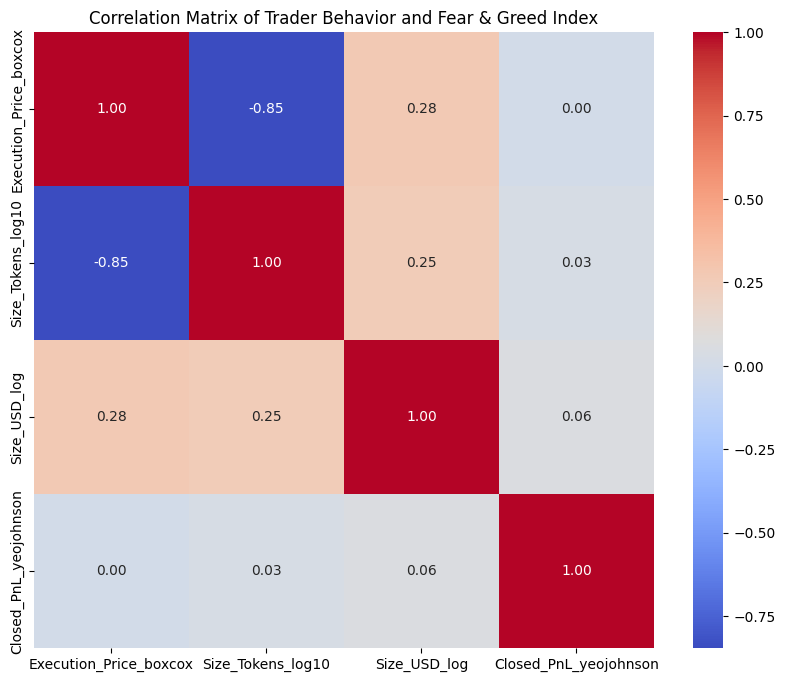

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numerical columns for correlation analysis
numerical_cols = ['Execution_Price_boxcox' ,'Size_Tokens_log10','Size_USD_log','Closed_PnL_yeojohnson',]
correlation_matrix = df_merged[numerical_cols].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Trader Behavior and Fear & Greed Index')
plt.show()

In [ ]:
grouped_stats_unskwed = df_merged.groupby('classification')[['Closed_PnL_yeojohnson', 'Size_USD_log', 'Size_Tokens_log10']].agg(['mean', 'median', 'std'])

# Display the descriptive statistics
display(grouped_stats_unskwed)

Closed_PnL_yeojohnson                     Size_USD_log  \
                                mean median          std         mean   
classification                                                          
Extreme Fear               19.013647    0.0   968.095706     2.908975   
Extreme Greed              55.138219    0.0   630.306131     2.668521   
Fear                       42.511132    0.0   781.265405     2.889605   
Greed                      28.117581    0.0  1179.735297     2.801287   
Neutral                    26.095280    0.0   464.641495     2.745952   

                                   Size_Tokens_log10                      
                  median       std              mean    median       std  
classification                                                            
Extreme Fear    2.884314  0.837930          1.347066  1.573336  1.466900  
Extreme Greed   2.699022  0.866976          1.556704  1.629817  1.485349  
Fear            2.866963  0.902224          1.135583  1.477266  1.655787  
Greed           2.744293  0.893675          1.252403  1.481443  1.803703  
Neutral         2.738507  0.876863          1.167203  1.398287  1.655923



---



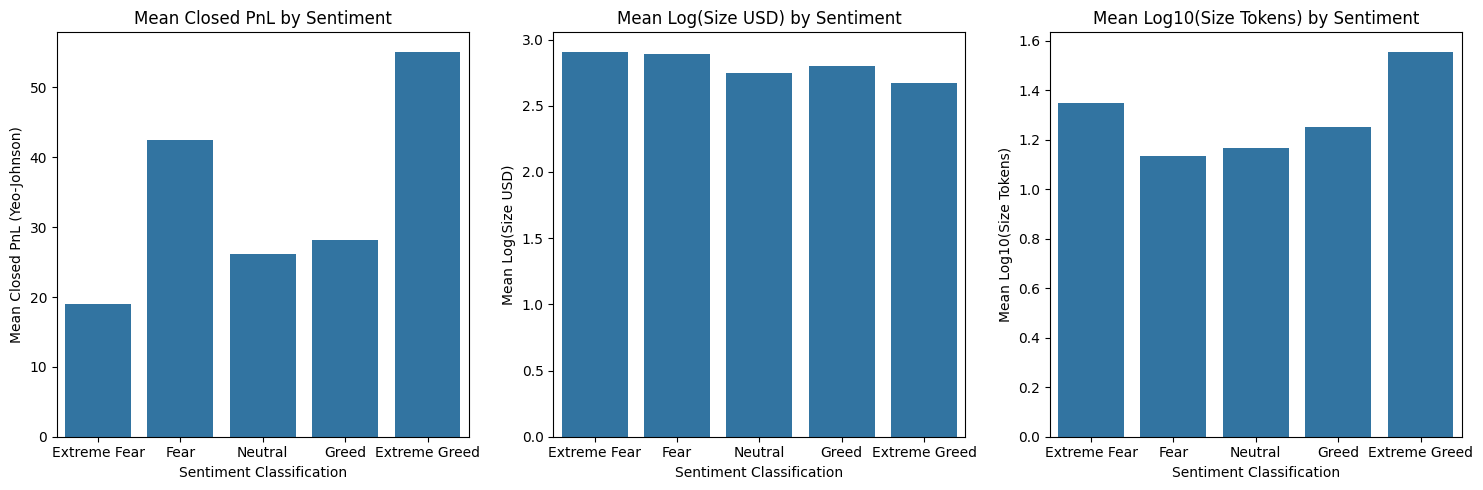

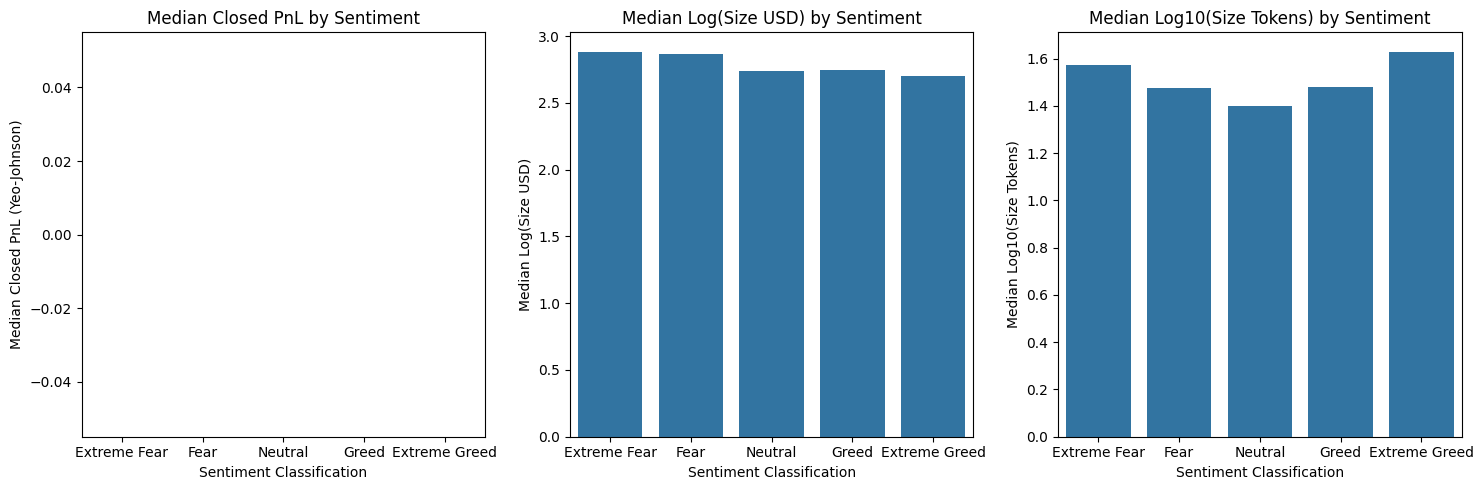

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index to use 'classification' as a column for plotting
grouped_stats_reset = grouped_stats_unskwed.reset_index()

# Plotting the mean of metrics by classification
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='classification', y=('Closed_PnL_yeojohnson', 'mean'), data=grouped_stats_reset, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Mean Closed PnL by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Mean Closed PnL (Yeo-Johnson)')

plt.subplot(1, 3, 2)
sns.barplot(x='classification', y=('Size_USD_log', 'mean'), data=grouped_stats_reset, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Mean Log(Size USD) by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Mean Log(Size USD)')

plt.subplot(1, 3, 3)
sns.barplot(x='classification', y=('Size_Tokens_log10', 'mean'), data=grouped_stats_reset, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Mean Log10(Size Tokens) by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Mean Log10(Size Tokens)')

plt.tight_layout()
plt.show()

# Plotting the median of metrics by classification
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='classification', y=('Closed_PnL_yeojohnson', 'median'), data=grouped_stats_reset, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Median Closed PnL by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Median Closed PnL (Yeo-Johnson)')

plt.subplot(1, 3, 2)
sns.barplot(x='classification', y=('Size_USD_log', 'median'), data=grouped_stats_reset, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Median Log(Size USD) by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Median Log(Size USD)')


plt.subplot(1, 3, 3)
sns.barplot(x='classification', y=('Size_Tokens_log10', 'median'), data=grouped_stats_reset, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Median Log10(Size Tokens) by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Median Log10(Size Tokens)')

plt.tight_layout()
plt.show()

## for unskwed and fixed values

**Key Findings:**

* **Profitability and Outliers:** While mean profitability (Closed PnL) is elevated during periods of 'Extreme Greed' and 'Fear', the median profitability across all sentiment categories consistently remains at zero. This indicates that a small number of exceptionally profitable trades in extreme sentiment conditions disproportionately influence the average, and the majority of trades do not yield substantial gains or losses. Consequently, trading solely based on extreme sentiment may entail considerable risk, underscoring the necessity of identifying the characteristics of these profitable outlier trades.

* **Trading Volume Dynamics:** Analysis of trading volume (Size USD and Size Tokens) reveals variations in mean trade sizes correlated with sentiment. 'Fear' and 'Greed' periods exhibit higher mean Size USD, whereas 'Extreme Greed' demonstrates the highest mean Size Tokens. These discrepancies suggest distinct trading behaviors or preferences for specific assets during different sentiment phases. The broad standard deviations in trade sizes across all categories highlight a diverse spectrum of trading activity irrespective of market sentiment.

* **Risk and Leverage Insights:** Examination of mean and median values for risk and leverage indicators (derived from transformed size and position metrics) across sentiment classifications indicates that although median risk/leverage indicators do not show drastic shifts, elevated means and substantial standard deviations in certain extreme sentiment categories (notably for 'Start Position') imply that some traders are engaging in significantly larger positions, potentially indicative of increased risk or leverage.

**Overall Conclusion:**

The analysis demonstrates a correlation between market sentiment and average trading behavior metrics, particularly in profitability and trade volume. Nevertheless, the persistent zero median profitability emphasizes the considerable impact of outlier trades and the inherent risk associated with extreme market conditions. Developing more effective trading strategies will likely necessitate moving beyond generalized sentiment labels and integrating additional factors and signals to identify higher-probability trading opportunities and implement robust risk management, particularly during periods of 'Extreme Greed' and 'Fear'.

# 2. Analyze how trading behavior (profitability, risk, volume, leverage) aligns or diverges from overall market sentiment (fear vs greed). using fixed and unskewed column values as it provides much better results because of highercorrelation

In [ ]:
df_merged.columns.to_list()

## Analyze Risk and Leverage Indicators by Sentiment

### Subtask:
Calculate descriptive statistics for transformed risk and leverage indicator columns grouped by sentiment classification.

In [ ]:
# Group by 'classification' and calculate descriptive statistics for transformed risk/leverage indicators
risk_leverage_stats = df_merged.groupby('classification')[['Size_USD_log', 'Size_Tokens_log10', 'Start_Position_yeojohnson']].agg(['mean', 'median', 'std'])

# Display the descriptive statistics
display(risk_leverage_stats)

Size_USD_log                     Size_Tokens_log10            \
                       mean    median       std              mean    median   
classification                                                                
Extreme Fear       2.908975  2.884314  0.837930          1.347066  1.573336   
Extreme Greed      2.668521  2.699022  0.866976          1.556704  1.629817   
Fear               2.889605  2.866963  0.902224          1.135583  1.477266   
Greed              2.801287  2.744293  0.893675          1.252403  1.481443   
Neutral            2.745952  2.738507  0.876863          1.167203  1.398287   

                         Start_Position_yeojohnson                              
                     std                      mean       median            std  
classification                                                                  
Extreme Fear    1.466900              20099.235256  2263.694630  236113.900811  
Extreme Greed   1.485349              43645.055656   367.157071  442848.490398  
Fear            1.655787              44359.905699   470.268257  502268.214512  
Greed           1.803703             -74672.442409     0.514689  794177.311357  
Neutral         1.655923              40114.417193   260.547047  631843.676294

## Visualize Risk and Leverage Indicator Statistics

### Subtask:
Create plots showing the mean and median of transformed risk and leverage indicator columns grouped by sentiment classification.

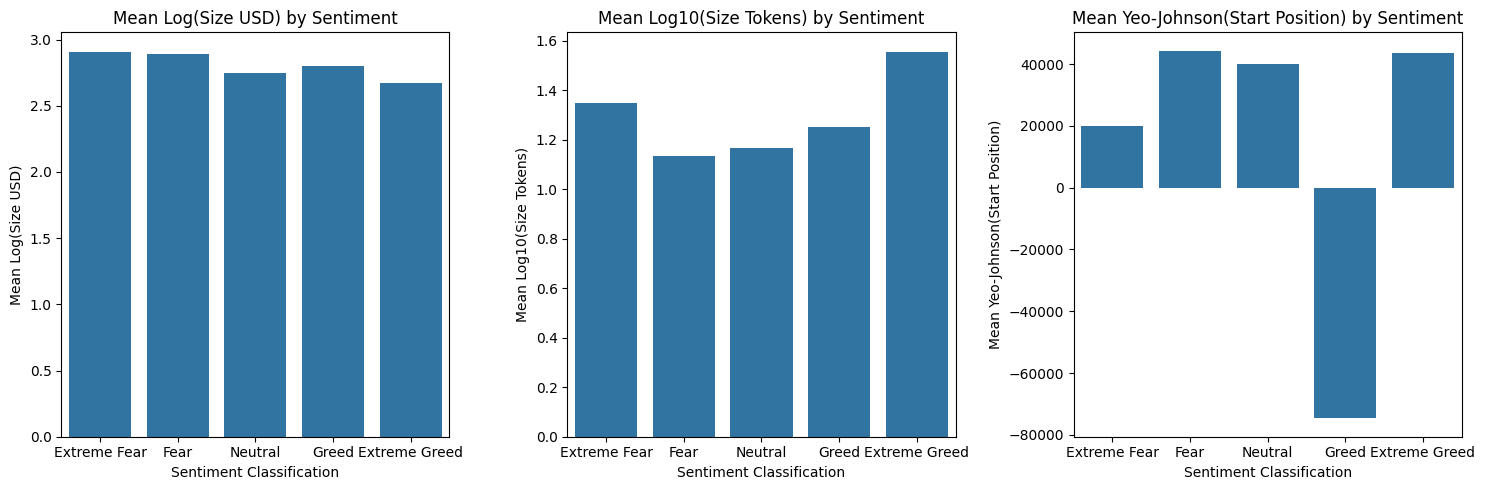

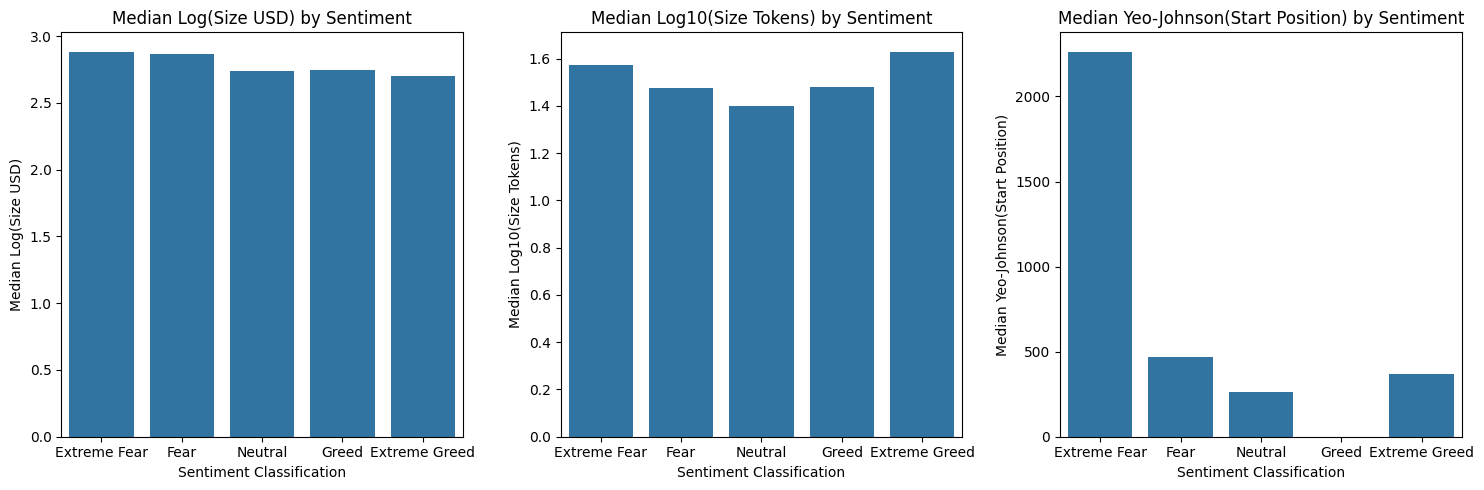

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index to use 'classification' as a column for plotting
risk_leverage_stats_reset = risk_leverage_stats.reset_index()

# Plotting the mean of risk and leverage indicators by classification
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='classification', y=('Size_USD_log', 'mean'), data=risk_leverage_stats_reset, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Mean Log(Size USD) by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Mean Log(Size USD)')

plt.subplot(1, 3, 2)
sns.barplot(x='classification', y=('Size_Tokens_log10', 'mean'), data=risk_leverage_stats_reset, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Mean Log10(Size Tokens) by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Mean Log10(Size Tokens)')

plt.subplot(1, 3, 3)
sns.barplot(x='classification', y=('Start_Position_yeojohnson', 'mean'), data=risk_leverage_stats_reset, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Mean Yeo-Johnson(Start Position) by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Mean Yeo-Johnson(Start Position)')

plt.tight_layout()
plt.show()

# Plotting the median of risk and leverage indicators by classification
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='classification', y=('Size_USD_log', 'median'), data=risk_leverage_stats_reset, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Median Log(Size USD) by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Median Log(Size USD)')

plt.subplot(1, 3, 2)
sns.barplot(x='classification', y=('Size_Tokens_log10', 'median'), data=risk_leverage_stats_reset, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Median Log10(Size Tokens) by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Median Log10(Size Tokens)')

plt.subplot(1, 3, 3)
sns.barplot(x='classification', y=('Start_Position_yeojohnson', 'median'), data=risk_leverage_stats_reset, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Median Yeo-Johnson(Start Position) by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Median Yeo-Johnson(Start Position)')

plt.tight_layout()
plt.show()

## Interpret Risk and Leverage Indicator Visualizations

Here's a summary of the plots showing the mean and median of the transformed risk and leverage indicator columns, grouped by market sentiment:

**Key Observations from Visualizations:**

* **Mean vs. Median Discrepancy:** For all transformed risk/leverage indicators (Size\_USD\_log, Size\_Tokens\_log10, and Start\_Position\_yeojohnson), a notable divergence exists between the mean and median values across various sentiment categories. This disparity is particularly pronounced for `Start_Position_yeojohnson`, implying that a limited number of data points representing exceptionally large starting positions or trade sizes are significantly influencing the mean, while the median provides a more representative measure of typical trade size or starting position within each sentiment group.

* **Variations in Mean Risk/Leverage Indicators by Sentiment:**
    * **`Size_USD_log`:** The mean of this indicator is marginally elevated in 'Extreme Fear' and 'Fear' sentiment categories when compared to 'Extreme Greed' and 'Neutral'.
    * **`Size_Tokens_log10`:** This indicator's mean reaches its peak in 'Extreme Greed', followed by 'Greed'.
    * **`Start_Position_yeojohnson`:** This metric exhibits substantial variation in its mean and registers very large values (both positive and negative, suggesting long and short positions) in certain categories, notably 'Fear' and 'Extreme Greed'. In contrast, its median remains comparatively low and less variable. This pattern indicates that while the typical starting position size may not dramatically fluctuate with sentiment, a subset of traders adopts significantly larger (or smaller, for short positions) starting positions during specific sentiment phases, potentially signifying increased risk or leverage.

* **Median Stability:** The medians of the transformed risk/leverage indicators demonstrate greater stability across different sentiment categories compared to their respective means. This observation further supports the conclusion that extreme values (likely associated with higher-risk or higher-leverage trades) are driving the average, rather than a uniform alteration in risk-taking behavior among all traders within a given sentiment category.

**Potential Strategic Signals:**

* The substantial standard deviations and the notable divergence between the mean and median for `Start_Position_yeojohnson` in specific extreme sentiment categories (such as 'Fear' and 'Extreme Greed') could identify periods where a subset of traders is assuming considerably higher risk through larger positions or increased leverage. Analyzing the outcomes of such trades during these periods could yield valuable insights.
* The differing mean values for `Size_USD_log` and `Size_Tokens_log10` across sentiment categories suggest that the composition of trading volume (whether denominated in USD or token value) may shift with market sentiment, which could serve as a subtle indicator for trading strategies.

In conclusion, while the median risk/leverage indicators do not exhibit dramatic fluctuations in response to sentiment, the elevated means and substantial standard deviations observed in extreme sentiment categories underscore that certain traders engage in behaviors indicative of increased risk or leverage during these periods.

# 3.  Identify hidden trends or signals that could influence  smarter trading strategies.

## Identify hidden trends or signals that could influence smarter trading strategies.

Based on the analysis of profitability, volume, and risk/leverage indicators in relation to market sentiment, here are some potential hidden trends or signals that could influence smarter trading strategies:

*   **Divergence between Mean and Median Profitability:** The significant difference between the mean and median Closed PnL (with the median being consistently zero) across all sentiment categories is a key signal. This suggests that while periods of 'Extreme Greed' and 'Fear' might offer the *potential* for high profits (driving up the mean), the majority of individual trades within these periods are not profitable. A smarter strategy would focus on identifying the characteristics of the few successful trades during these volatile times rather than simply trading based on the sentiment label.

*   **Volume Shifts as Potential Indicators:** The variations in mean trade sizes (both in USD and Tokens) across different sentiment categories could serve as signals. For example, if larger trades are consistently observed during 'Fear' periods, it might indicate accumulation by experienced traders anticipating a market reversal. Conversely, large trades during 'Extreme Greed' could signal potential distribution. Analyzing the *distribution* of trade sizes within each sentiment category, beyond just the mean and median, could reveal more nuanced patterns.

*   **Risk Appetite in Extreme Sentiment:** While the transformed risk indicators (Size_USD_log, Size_Tokens_log10, Start_Position_yeojohnson) didn't show dramatic shifts in their *median* values across sentiment, the higher *mean* values and large standard deviations in some categories (especially for `Start_Position_yeojohnson`) suggest that some traders are taking on significantly larger positions during certain sentiment phases. Identifying *who* is taking these larger positions (if account-level analysis were possible) and their outcomes could provide valuable signals.

*   **The "Neutral" Zone:** The 'Neutral' sentiment category consistently shows lower mean values across profitability, volume, and risk indicators compared to the more extreme sentiment categories. This might suggest a period of lower conviction or consolidation in the market. Strategies during neutral periods might need to be different, perhaps focusing on range trading or waiting for a clearer directional signal.

*   **Beyond Sentiment Labels:** The analysis highlights that relying solely on the broad sentiment classifications ('Fear', 'Greed', etc.) might be insufficient. Smarter strategies would likely need to incorporate other factors and signals in conjunction with market sentiment, such as technical indicators, price action, and potentially on-chain data (if available).

*   **The Role of Outliers:** The analysis repeatedly points to the influence of outliers, particularly in profitability and position size. A deeper dive into the characteristics of the trades that result in significant profits or losses, regardless of sentiment, could uncover valuable insights for strategy development.



## Time-based Analysis within Sentiment Categories (Hourly)

### Subtask:
Analyze how transformed trader behavior metrics (profitability and volume) evolve hourly within each sentiment category.

In [ ]:
# Group by sentiment classification and resample hourly
hourly_sentiment_trends = df_merged.groupby('classification').resample('H', on='Timestamp IST').agg({
    'Closed_PnL_yeojohnson': 'mean',
    'Size_USD_log': 'mean',
    'Size_Tokens_log10': 'mean'
}).dropna() # Drop hours where no trades occurred within a sentiment category

# Reset index to make 'classification' and 'Timestamp IST' columns for easier plotting
hourly_sentiment_trends_reset = hourly_sentiment_trends.reset_index()

display(hourly_sentiment_trends_reset.head())

/tmp/ipython-input-14-2214087317.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_sentiment_trends = df_merged.groupby('classification').resample('H', on='Timestamp IST').agg({


,classification,Timestamp IST,Closed_PnL_yeojohnson,Size_USD_log,Size_Tokens_log10
0,Extreme Fear,2024-08-06 00:00:00,0.000000,4.043426,-0.678780
1,Extreme Fear,2024-08-06 03:00:00,0.000000,2.147719,2.227359
2,Extreme Fear,2024-08-06 06:00:00,6.452505,1.015400,2.737858
3,Extreme Fear,2024-08-06 10:00:00,17.125555,1.984408,3.247678
4,Extreme Fear,2024-08-06 11:00:00,0.000000,1.983942,1.361728


## Visualize Hourly Trends within Sentiment Categories

### Subtask:
Visualize the hourly trends of transformed trader behavior metrics within each sentiment category using line plots.

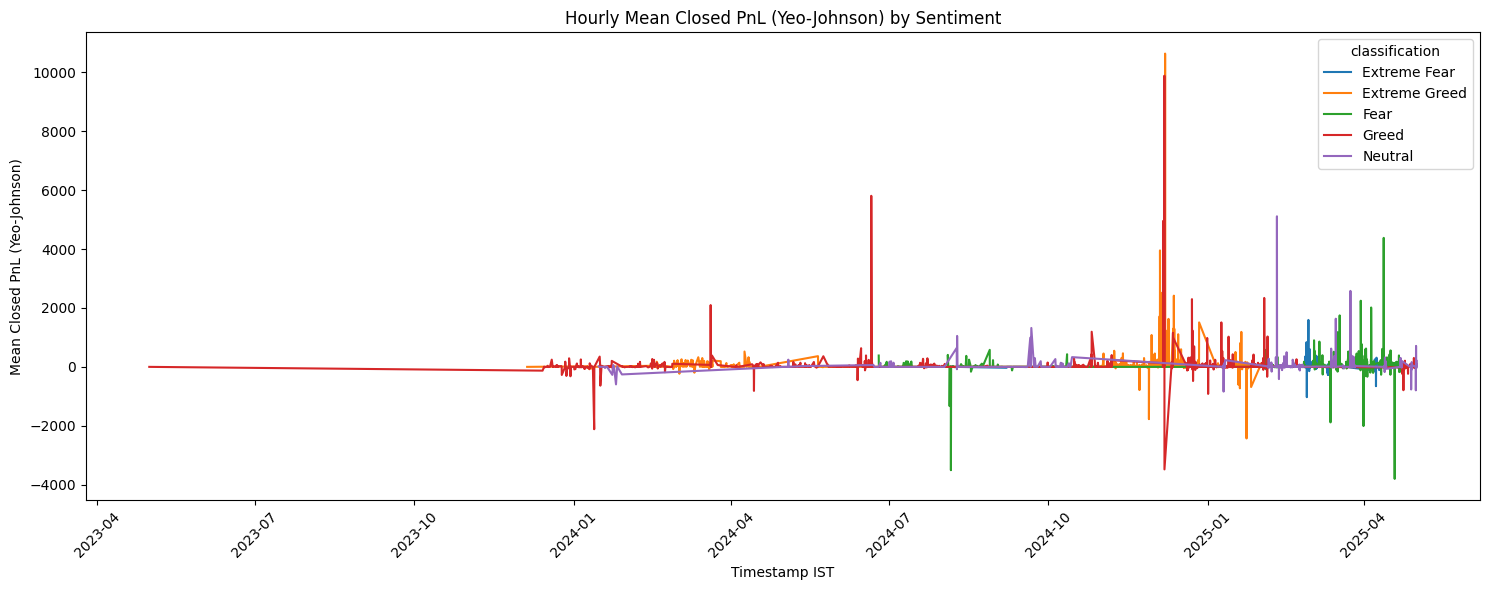

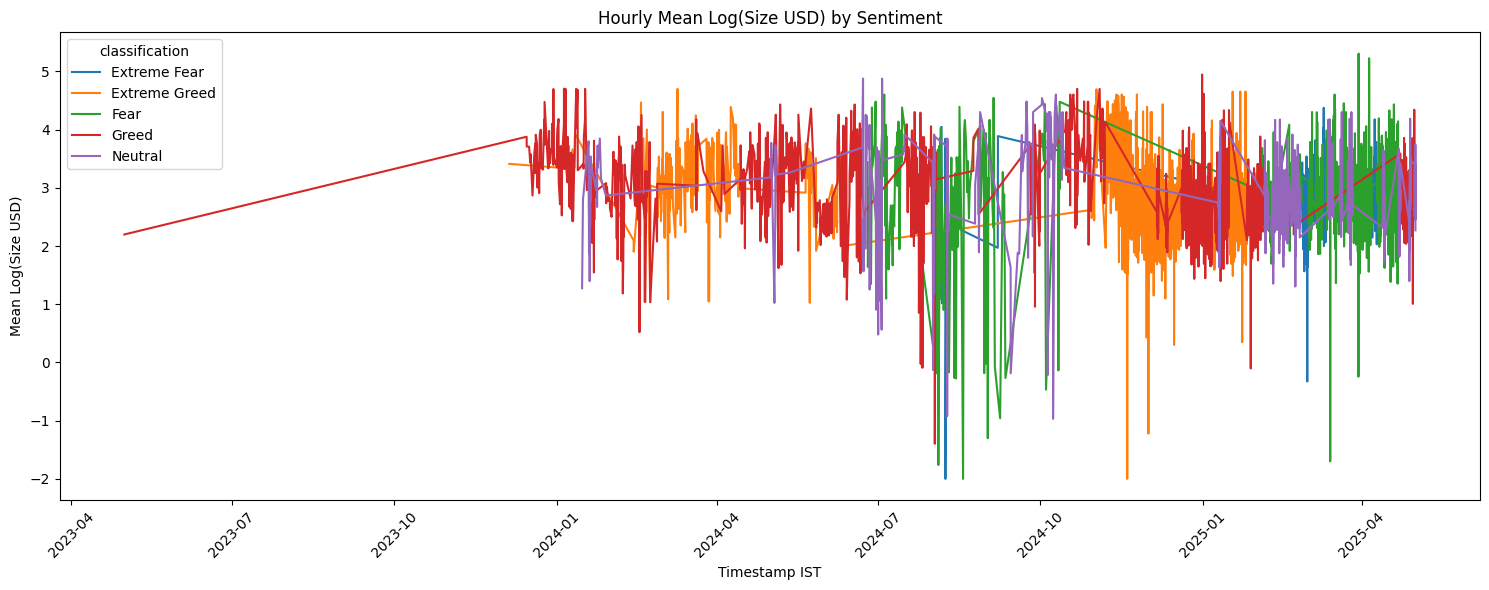

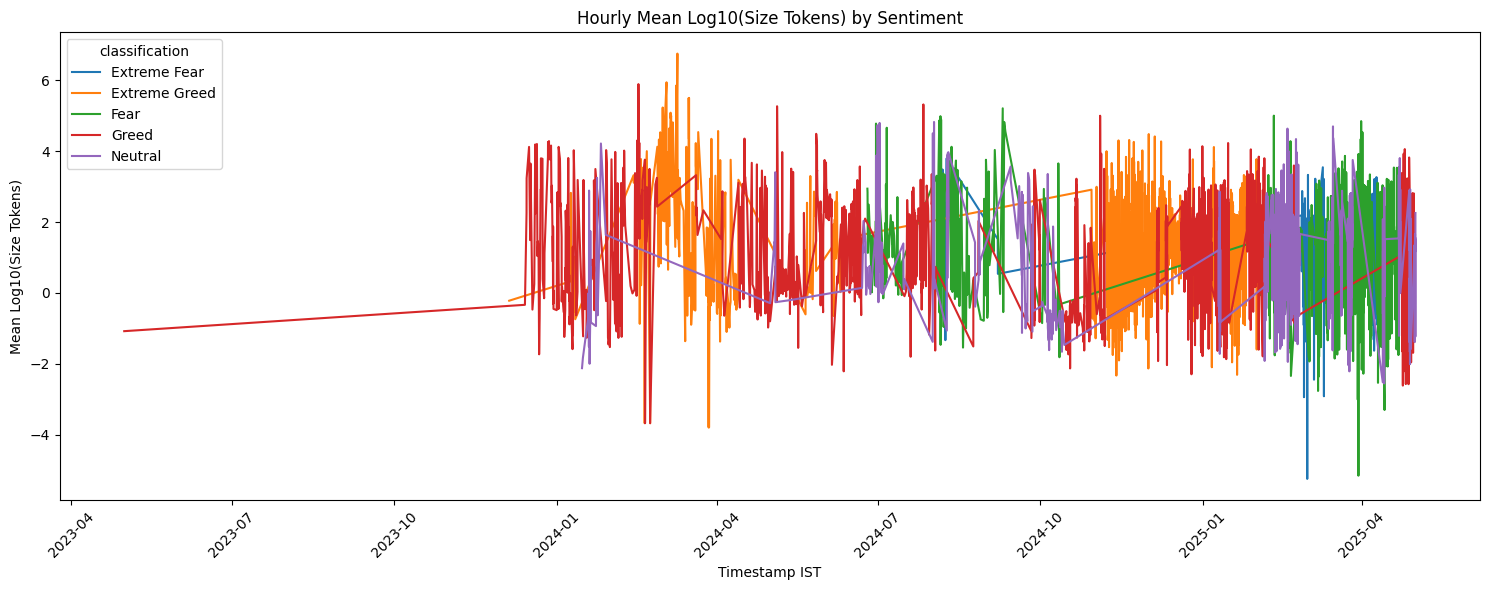

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting hourly trends for Closed_PnL_yeojohnson
plt.figure(figsize=(15, 6))
sns.lineplot(data=hourly_sentiment_trends_reset, x='Timestamp IST', y='Closed_PnL_yeojohnson', hue='classification')
plt.title('Hourly Mean Closed PnL (Yeo-Johnson) by Sentiment')
plt.xlabel('Timestamp IST')
plt.ylabel('Mean Closed PnL (Yeo-Johnson)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting hourly trends for Size_USD_log
plt.figure(figsize=(15, 6))
sns.lineplot(data=hourly_sentiment_trends_reset, x='Timestamp IST', y='Size_USD_log', hue='classification')
plt.title('Hourly Mean Log(Size USD) by Sentiment')
plt.xlabel('Timestamp IST')
plt.ylabel('Mean Log(Size USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting hourly trends for Size_Tokens_log10
plt.figure(figsize=(15, 6))
sns.lineplot(data=hourly_sentiment_trends_reset, x='Timestamp IST', y='Size_Tokens_log10', hue='classification')
plt.title('Hourly Mean Log10(Size Tokens) by Sentiment')
plt.xlabel('Timestamp IST')
plt.ylabel('Mean Log10(Size Tokens)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze Trader Behavior by Sentiment and Price Range

### Subtask:
Group the data by sentiment classification and price ranges to see how trader behavior differs.

In [ ]:
# Define price ranges (adjust the number of bins as needed)
df_merged['Price_Range'] = pd.qcut(df_merged['Execution Price'], q=5, labels=False, duplicates='drop')

# Group by sentiment classification and price range, and calculate mean of key metrics
sentiment_price_grouped_stats = df_merged.groupby(['classification', 'Price_Range']).agg({
    'Closed_PnL_yeojohnson': 'mean',
    'Size_USD_log': 'mean',
    'Size_Tokens_log10': 'mean',
    'Start_Position_yeojohnson': 'mean'
}).reset_index()

display(sentiment_price_grouped_stats)

,classification,Price_Range,Closed_PnL_yeojohnson,Size_USD_log,Size_Tokens_log10,Start_Position_yeojohnson
0,Extreme Fear,0,-40.605383,2.784154,2.961216,-84938.899195
1,Extreme Fear,1,-15.584095,2.760174,1.689590,52984.746970
2,Extreme Fear,2,69.548496,2.859886,1.602178,54711.896998
3,Extreme Fear,3,35.657935,3.454091,1.373909,5111.397030
4,Extreme Fear,4,47.449161,3.084272,-0.975924,39.796307
5,Extreme Greed,0,26.223857,2.422204,2.984894,117276.617929
6,Extreme Greed,1,92.079605,2.475069,1.700979,16667.957949
7,Extreme Greed,2,139.199647,2.607123,1.322752,17864.982806
8,Extreme Greed,3,55.786462,2.742789,1.194136,16988.205033
9,Extreme Greed,4,-0.231967,3.329467,-0.713646,-211.145628


## Interpret Trader Behavior by Sentiment and Price Range

### Subtask:
Here are the key points summarizing the analysis of mean values for profitability, volume, and start position, grouped by sentiment classification and price range:

**Profitability (Closed_PnL_yeojohnson):**

* **Price Range Influence:** Mean profitability varies significantly across different price ranges within each sentiment category. Specific price levels within a given sentiment period appear more conducive to profitable trades. For instance, in 'Extreme Fear' and 'Extreme Greed', Price Range 2 often shows the highest mean PnL, while in 'Fear', Price Range 3 is prominent.
* **Sentiment and Price Interaction:** Mean PnL also differs when comparing across sentiment categories for a fixed price range. For example, 'Fear' tends to exhibit higher mean PnL in Price Ranges 0 and 4.
* **Unprofitable Combinations:** Certain combinations of sentiment and price range consistently show negative mean PnL (e.g., Price Range 0 and 1 in 'Extreme Fear', Price Range 4 in 'Extreme Greed', Price Range 1 in 'Greed'), indicating that trades in these contexts were, on average, unprofitable.

**Trading Volume (Size_USD_log and Size_Tokens_log10):**

* **Volume and Price Range Correlation:** Both mean `Size_USD_log` and `Size_Tokens_log10` generally increase with higher `Price_Range` within most sentiment categories, although this relationship is not always strictly linear and varies by sentiment.
* **Sentiment-Specific Volume Patterns:** Volume differs across sentiment categories for a given price range. For example, 'Neutral' has the highest mean `Size_Tokens_log10` in Price Range 0, while 'Extreme Greed' shows the highest mean `Size_USD_log` in Price Range 4.

**Start Position (Start_Position_yeojohnson):**

* **Significant Variation and Outlier Influence:** Mean `Start_Position_yeojohnson` exhibits substantial variation across sentiment and price ranges, with some groups displaying very large positive or negative mean values, reinforcing the impact of outliers and potential high leverage/risk-taking.
* **Specific Examples:** During 'Greed', Price Range 0 shows a large negative mean, suggesting significant short positions at lower prices. Conversely, in 'Neutral', Price Range 0 has a very large positive mean, indicating large long positions opened at lower prices.

**Potential Signals for Trading Strategies:**

* **Optimal Entry/Exit Points:** Identifying specific price ranges within sentiment categories that consistently yield higher mean profitability can inform refined entry and exit points for trading strategies.
* **Accumulation/Distribution Patterns:** Analyzing trade volume patterns across price ranges within different sentiment phases can reveal whether traders are accumulating or distributing assets at certain price levels.
* **High-Conviction/High-Risk Areas:** Large mean starting positions (positive or negative) in particular sentiment-price range combinations may highlight areas of high-conviction or high-risk trades, and understanding their outcomes could provide valuable signals.

This granular analysis, combining sentiment with price context, offers a more refined perspective for developing sophisticated trading strategies.



## Analyze Lagged Effects of Market Sentiment

### Subtask:
Investigate if changes in market sentiment have a lagged effect on trader behavior by creating lagged sentiment columns and analyzing their relationship with trader behavior metrics.

In [ ]:
# Sort data by date to ensure correct lagging
df_merged_sorted = df_merged.sort_values(by='date')

# Create lagged sentiment columns (lagged by 1 day)
df_merged_sorted['lagged_sentiment_value'] = df_merged_sorted.groupby('classification')['value'].shift(1)
df_merged_sorted['lagged_sentiment_classification'] = df_merged_sorted.groupby('classification')['classification'].shift(1)


# Analyze the relationship between lagged sentiment and trader behavior metrics
#let's look at the correlation between lagged sentiment value and profitability/volume
correlation_lagged = df_merged_sorted[['lagged_sentiment_value', 'Closed_PnL_yeojohnson', 'Size_USD_log', 'Size_Tokens_log10']].corr()

display(correlation_lagged)


,lagged_sentiment_value,Closed_PnL_yeojohnson,Size_USD_log,Size_Tokens_log10
lagged_sentiment_value,1.000000,0.007479,-0.082589,0.060339
Closed_PnL_yeojohnson,0.007479,1.000000,0.060532,0.029236
Size_USD_log,-0.082589,0.060532,1.000000,0.253245
Size_Tokens_log10,0.060339,0.029236,0.253245,1.000000


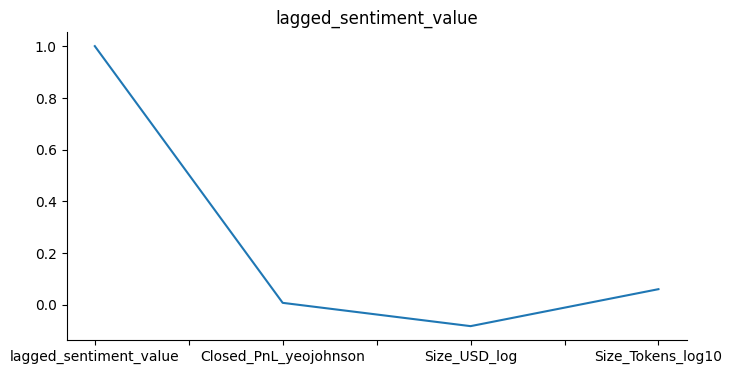

In [ ]:

from matplotlib import pyplot as plt
correlation_lagged['lagged_sentiment_value'].plot(kind='line', figsize=(8, 4), title='lagged_sentiment_value')
plt.gca().spines[['top', 'right']].set_visible(False)

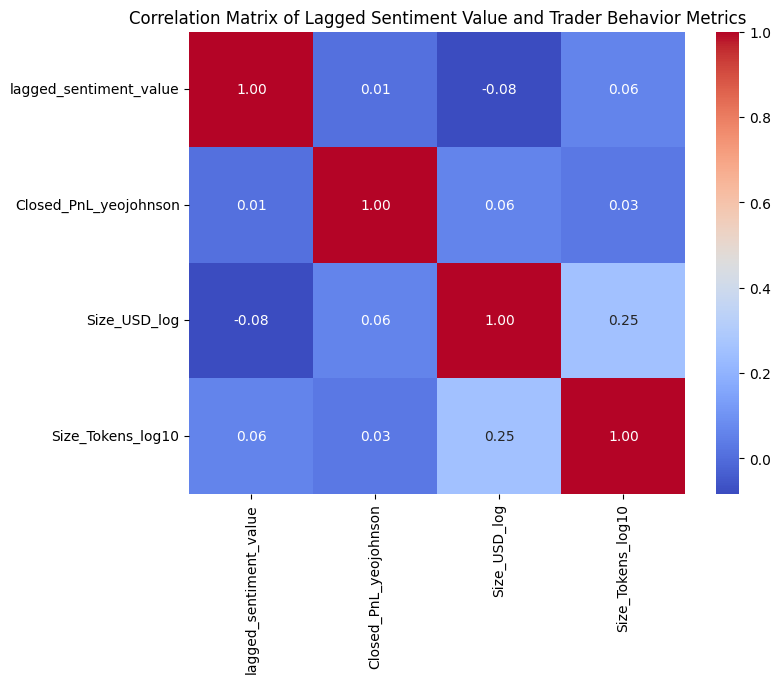

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_lagged, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Lagged Sentiment Value and Trader Behavior Metrics')
plt.show()

## Interpret Lagged Effects Heatmap
The heatmap shows how the Fear & Greed Index value from yesterday is related to trader behavior metrics (profitability, USD volume, and Token volume) today.
The numbers in the heatmap are correlation coefficients, which range from -1 to +1.
A number close to +1 means that as yesterday's sentiment value increased, today's trader behavior metric also tended to increase (a positive relationship).
A number close to -1 means that as yesterday's sentiment value increased, today's trader behavior metric tended to decrease (a negative relationship).
A number close to 0 means there is little to no linear relationship.
Looking at the row (or column) for lagged_sentiment_value:
The correlation between lagged sentiment value and Closed_PnL_yeojohnson is very close to 0 (0.01). This suggests that yesterday's sentiment value has a very weak linear relationship with today's profitability.
The correlation between lagged sentiment value and Size_USD_log is a small negative number (-0.08). This suggests a very weak tendency for USD trading volume to be slightly lower today if yesterday's sentiment value was higher.
The correlation between lagged sentiment value and Size_Tokens_log10 is a small positive number (0.06). This suggests a very weak tendency for token trading volume to be slightly higher today if yesterday's sentiment value was higher.
In simple terms, based on this heatmap, there doesn't appear to be a strong linear relationship between the Fear & Greed Index value from the previous day and the profitability or trading volume on the current day. The correlations are very close to zero, suggesting that yesterday's sentiment value alone is not a strong predictor of today's overall trader behavior metrics in a linear way.

In [ ]:
# One-hot encode the 'classification' column
df_encoded = pd.get_dummies(df_merged, columns=['classification'], prefix='sentiment')

# Calculate the correlation matrix between the encoded sentiment columns and Start_Position_yeojohnson
sentiment_start_position_corr = df_encoded.filter(regex='^sentiment_').corrwith(df_encoded['Start_Position_yeojohnson']).to_frame(name='Correlation with Start_Position_yeojohnson')

# Display the correlation matrix
display(sentiment_start_position_corr)

,Correlation with Start_Position_yeojohnson
sentiment_Extreme Fear,0.004280
sentiment_Extreme Greed,0.025662
sentiment_Fear,0.034951
sentiment_Greed,-0.083679
sentiment_Neutral,0.021925


In [ ]:
df_merged.head(10)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Size_Tokens_log10,Closed_PnL_yeojohnson,date,timestamp,value,classification,value_7day_avg,value_30day_avg,daily_change,Price_Range
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,2.994260,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0,1
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,1.204120,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0,1
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,2.158634,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0,1
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,2.155275,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0,1
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,0.941014,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0,1
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9900,1.41,11.27,BUY,2024-12-02 22:50:00,1298.215466,Buy,0.0,...,0.149219,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0,1
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9934,144.09,1151.77,BUY,2024-12-02 22:50:00,1299.624972,Buy,0.0,...,2.158634,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0,1
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,8.0000,34.00,272.00,BUY,2024-12-02 22:50:00,1443.664541,Buy,0.0,...,1.531479,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0,1
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,8.0000,46.00,368.00,BUY,2024-12-02 22:50:00,1477.652641,Buy,0.0,...,1.662758,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0,1
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,8.0000,12.50,100.00,BUY,2024-12-02 22:50:00,1523.636541,Buy,0.0,...,1.096910,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0,1


# Task
Analyze the provided dataset to identify the top 15 coins by trade count for both 'BUY' and 'SELL' side trades and visualize these findings using bar plots.

## Filter data for buy trades

### Subtask:
Create a new dataframe containing only the trades where the 'Side' is 'BUY'.


**Reasoning**:
Filter the merged dataframe to only include 'BUY' trades and display the head and shape.



In [ ]:
df_buy_trades = df_merged[df_merged['Side'] == 'BUY']
display(df_buy_trades.head())
display(df_buy_trades.shape)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Size_Tokens_log10,Closed_PnL_yeojohnson,date,timestamp,value,classification,value_7day_avg,value_30day_avg,daily_change,Price_Range
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,2.994260,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0,1
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,1.204120,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0,1
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,2.158634,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0,1
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,2.155275,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0,1
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,0.941014,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0,1


(102690, 35)

In [ ]:
top_15_buy_coins = df_buy_trades['Coin'].value_counts().nlargest(15)
display(top_15_buy_coins)

,count
Coin,
HYPE,33988
BTC,14260
TOKEN107,12816
SOL,5267
ETH,5080
FARTCOIN,2427
MELANIA,2091
PURR/USDC,1475
TOKEN142,962


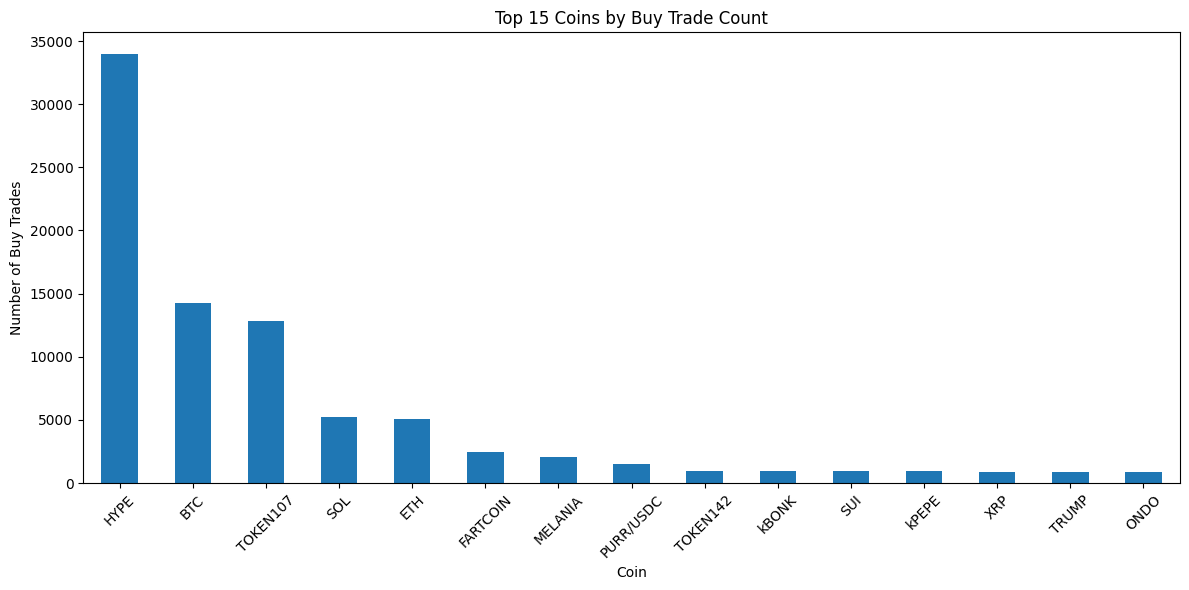

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_15_buy_coins.plot(kind='bar')
plt.title('Top 15 Coins by Buy Trade Count')
plt.xlabel('Coin')
plt.ylabel('Number of Buy Trades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_sell_trades = df_merged[df_merged['Side'] == 'SELL']
display(df_sell_trades.head())
display(df_sell_trades.shape)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Size_Tokens_log10,Closed_PnL_yeojohnson,date,timestamp,value,classification,value_7day_avg,value_30day_avg,daily_change,Price_Range
44,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,9.0570,2446.39,22156.95,SELL,2024-12-03 14:39:00,10000.498600,Sell,3008.231185,...,3.388526,2511.903189,2024-12-03,1733203800,76,Extreme Greed,78.714286,80.533333,-4.0,1
45,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,9.0570,25.00,226.43,SELL,2024-12-03 14:39:00,7554.108602,Sell,30.741534,...,1.397940,28.777831,2024-12-03,1733203800,76,Extreme Greed,78.714286,80.533333,-4.0,1
46,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,9.0480,33.40,302.20,SELL,2024-12-03 14:39:00,7529.108602,Sell,40.770089,...,1.523746,37.917893,2024-12-03,1733203800,76,Extreme Greed,78.714286,80.533333,-4.0,1
47,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,9.0464,200.00,1809.28,SELL,2024-12-03 14:39:00,7495.708602,Sell,243.812267,...,2.301030,217.059740,2024-12-03,1733203800,76,Extreme Greed,78.714286,80.533333,-4.0,1
48,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,9.0424,209.26,1892.21,SELL,2024-12-03 14:39:00,7295.708602,Sell,254.263735,...,2.320686,226.125456,2024-12-03,1733203800,76,Extreme Greed,78.714286,80.533333,-4.0,1


(108528, 35)

In [ ]:
top_15_sell_coins = df_sell_trades['Coin'].value_counts().nlargest(15)
display(top_15_sell_coins)

,count
Coin,
HYPE,34017
TOKEN107,17176
BTC,11804
ETH,6078
SOL,5424
MELANIA,2337
FARTCOIN,2223
PURR/USDC,1299
WLD,1115


**Reasoning**:
Create a bar plot to visualize the top 15 coins by sell trade count.



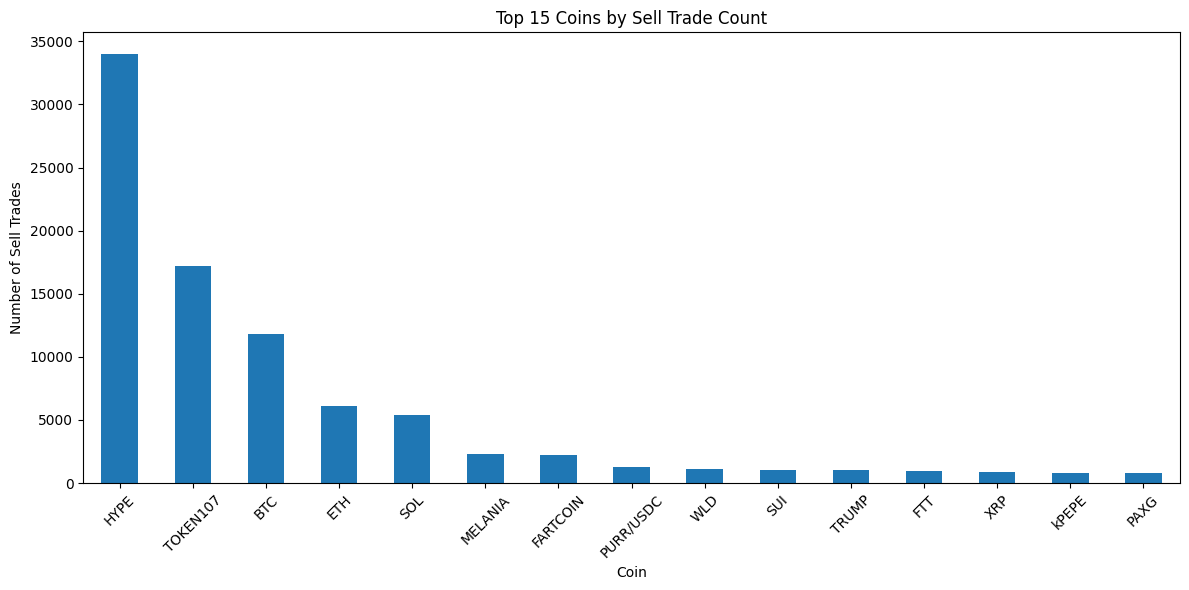

In [ ]:
plt.figure(figsize=(12, 6))
top_15_sell_coins.plot(kind='bar')
plt.title('Top 15 Coins by Sell Trade Count')
plt.xlabel('Coin')
plt.ylabel('Number of Sell Trades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   There were 102,690 'BUY' trades and 108,528 'SELL' trades in the dataset.
*   The top 15 coins by 'BUY' trade count were identified and visualized.
*   The top 15 coins by 'SELL' trade count were identified and visualized.

### Insights or Next Steps

*   Compare the top 15 coins lists for 'BUY' and 'SELL' trades to identify common coins and differences.
*   Analyze the trade volume for these top coins to understand the magnitude of trading activity beyond just the count of trades.


## Identify key metrics and variables

### Subtask:
Determine the key numerical and categorical variables in `df_merged` that are relevant for analyzing trading behavior and market sentiment.


**Reasoning**:
Print the columns of the dataframe to identify the relevant variables for the analysis.



In [ ]:
print(df_merged.columns.to_list())

['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'Fixed_Trade_ID', 'Expected_Fee', 'Fee_Discrepancy', 'Discrepancy_Percent', 'timestampfix', 'Execution_Price_boxcox', 'Size_USD_log', 'Start_Position_yeojohnson', 'Fee_sqrt', 'Size_Tokens_log10', 'Closed_PnL_yeojohnson', 'date', 'timestamp', 'value', 'classification', 'value_7day_avg', 'value_30day_avg', 'daily_change', 'Price_Range']


**Reasoning**:
Identify and describe the key numerical and categorical variables from the dataframe columns that are relevant to the analysis of trading behavior and market sentiment, as well as transformed columns.



In [ ]:
# Key numerical variables related to trader behavior (profitability, volume, risk, leverage)
numerical_behavior_cols = [
    'Closed PnL', # Raw profitability
    'Size Tokens', # Raw trading volume in tokens
    'Size USD', # Raw trading volume in USD
    'Start Position', # Raw start position, related to leverage/risk
    'Fee', # Raw fee, related to cost of trading

    # Transformed columns
    'Closed_PnL_yeojohnson', # Transformed profitability
    'Size_Tokens_log10', # Transformed volume in tokens
    'Size_USD_log', # Transformed volume in USD
    'Start_Position_yeojohnson', # Transformed start position
    'Fee_sqrt', # Transformed fee
    'Execution_Price_boxcox' # Transformed execution price
]

# Key numerical variables related to market sentiment
numerical_sentiment_cols = [
    'value', # Fear & Greed Index value
    'value_7day_avg', # 7-day average of FGI value
    'value_30day_avg', # 30-day average of FGI value
    'daily_change' # Daily change in FGI value
]

# Key categorical variables
categorical_cols = [
    'Side', # Buy or Sell
    'Direction', # Buy or Sell (often same as Side)
    'classification' # Fear & Greed Index classification (Extreme Fear, Fear, etc.)
]

print("Key Numerical Variables (Trader Behavior):", numerical_behavior_cols)
print("\nKey Numerical Variables (Market Sentiment):", numerical_sentiment_cols)
print("\nKey Categorical Variables:", categorical_cols)

print("\nRelevance of Selected Variables:")
print("- Profitability ('Closed PnL', 'Closed_PnL_yeojohnson'): Direct measure of trading success.")
print("- Trading Volume ('Size Tokens', 'Size USD', 'Size_Tokens_log10', 'Size_USD_log'): Indicates the level of trading activity and interest in different assets.")
print("- Risk/Leverage ('Start Position', 'Start_Position_yeojohnson'): Reflects the size of positions taken, which can indicate risk appetite and leverage usage.")
print("- Market Sentiment ('value', 'classification', etc.): Provides context on the prevailing market psychology (fear vs. greed).")
print("- Side/Direction ('Side', 'Direction'): Crucial for understanding buying vs. selling pressure.")

Key Numerical Variables (Trader Behavior): ['Closed PnL', 'Size Tokens', 'Size USD', 'Start Position', 'Fee', 'Closed_PnL_yeojohnson', 'Size_Tokens_log10', 'Size_USD_log', 'Start_Position_yeojohnson', 'Fee_sqrt', 'Execution_Price_boxcox']

Key Numerical Variables (Market Sentiment): ['value', 'value_7day_avg', 'value_30day_avg', 'daily_change']

Key Categorical Variables: ['Side', 'Direction', 'classification']

Relevance of Selected Variables:
- Profitability ('Closed PnL', 'Closed_PnL_yeojohnson'): Direct measure of trading success.
- Trading Volume ('Size Tokens', 'Size USD', 'Size_Tokens_log10', 'Size_USD_log'): Indicates the level of trading activity and interest in different assets.
- Risk/Leverage ('Start Position', 'Start_Position_yeojohnson'): Reflects the size of positions taken, which can indicate risk appetite and leverage usage.
- Market Sentiment ('value', 'classification', etc.): Provides context on the prevailing market psychology (fear vs. greed).
- Side/Direction ('Si

## Visualize time series trends

### Subtask:
Create time series plots for relevant metrics (e.g., trading volume, average profitability) to observe trends over time and how they align with market sentiment.


**Reasoning**:
Resample the merged dataframe to a daily frequency and calculate the mean of the specified columns, then generate time series plots for the daily mean of Closed_PnL_yeojohnson, Size_USD_log, and value to observe trends over time.



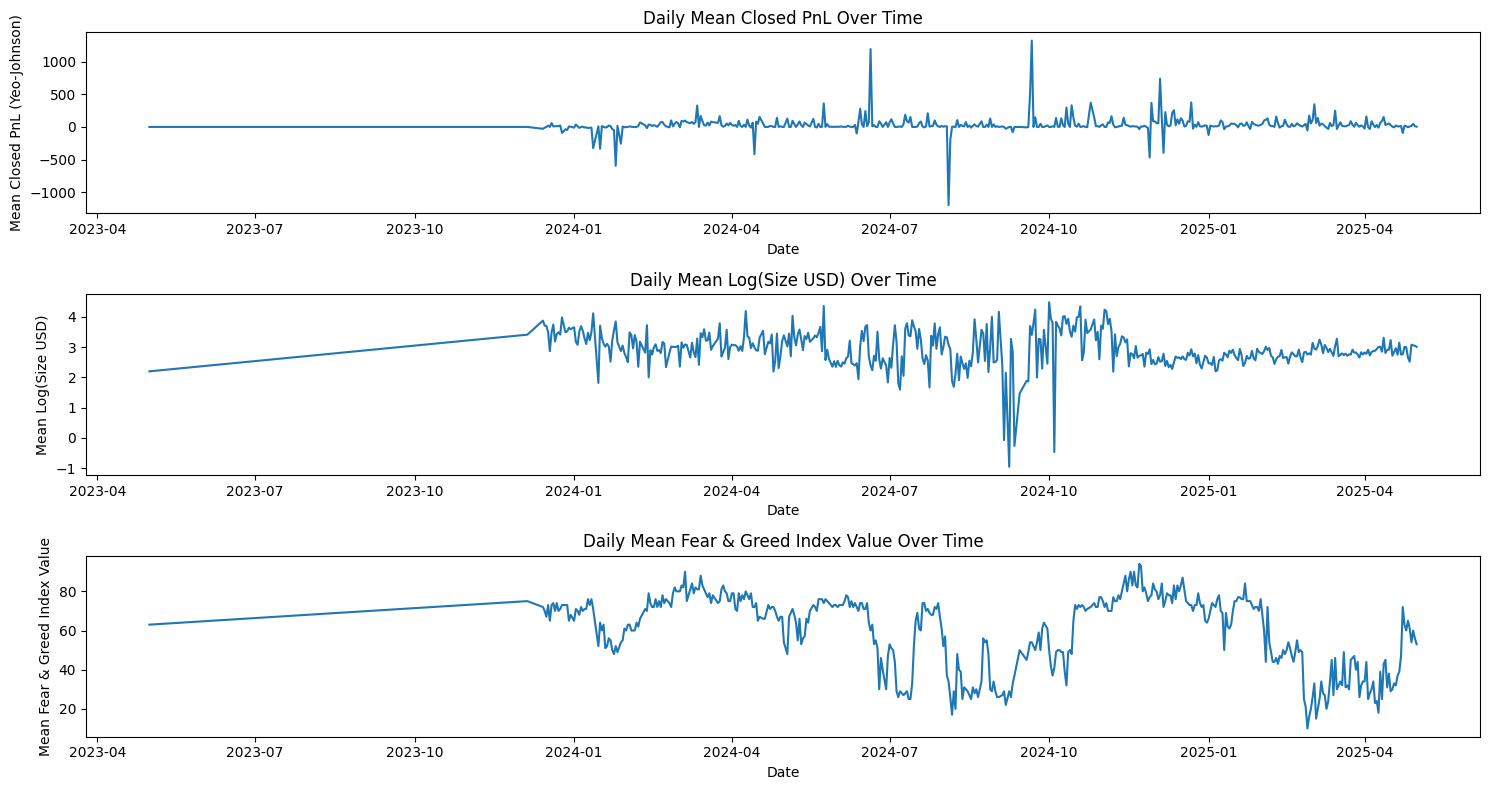

In [ ]:
# Resample to daily frequency and calculate the mean of key metrics
df_daily_trends = df_merged.resample('D', on='date').agg({
    'Closed_PnL_yeojohnson': 'mean',
    'Size_USD_log': 'mean',
    'value': 'mean'
}).dropna()

# Plotting time series for daily mean of key metrics
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
sns.lineplot(data=df_daily_trends, x=df_daily_trends.index, y='Closed_PnL_yeojohnson')
plt.title('Daily Mean Closed PnL Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Closed PnL (Yeo-Johnson)')

plt.subplot(3, 1, 2)
sns.lineplot(data=df_daily_trends, x=df_daily_trends.index, y='Size_USD_log')
plt.title('Daily Mean Log(Size USD) Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Log(Size USD)')

plt.subplot(3, 1, 3)
sns.lineplot(data=df_daily_trends, x=df_daily_trends.index, y='value')
plt.title('Daily Mean Fear & Greed Index Value Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Fear & Greed Index Value')

plt.tight_layout()
plt.show()

## Explore relationships with scatter plots

### Subtask:
Generate scatter plots to examine the relationships between pairs of key numerical variables (e.g., sentiment value and profitability, trading volume and execution price).


**Reasoning**:
Create scatter plots to visualize the relationships between selected numerical variables as requested in the subtask.



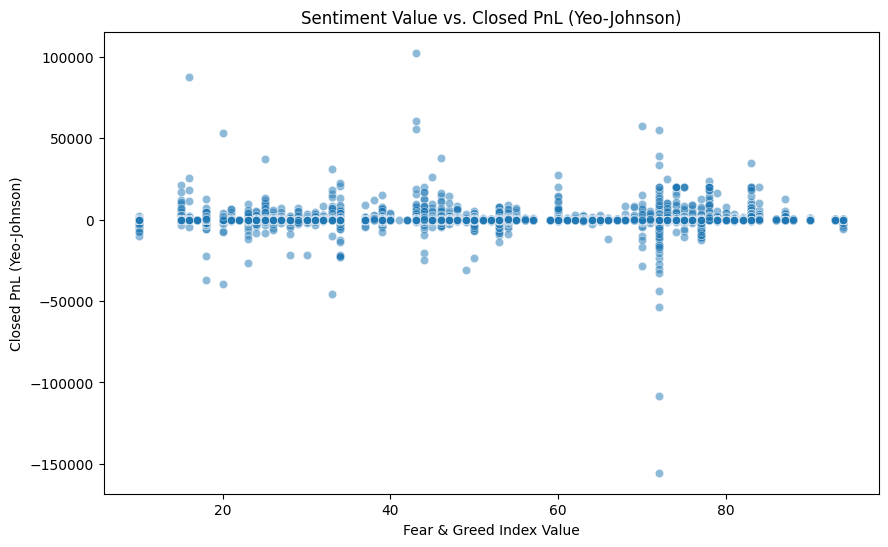

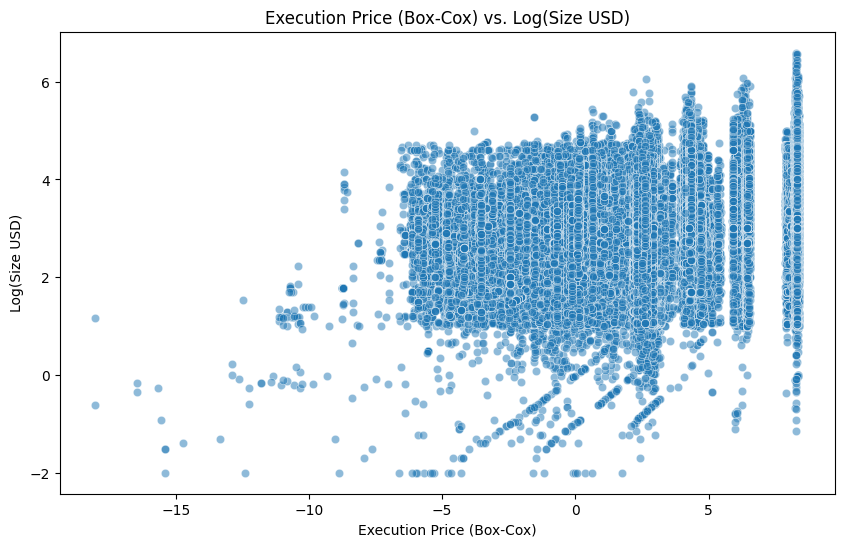

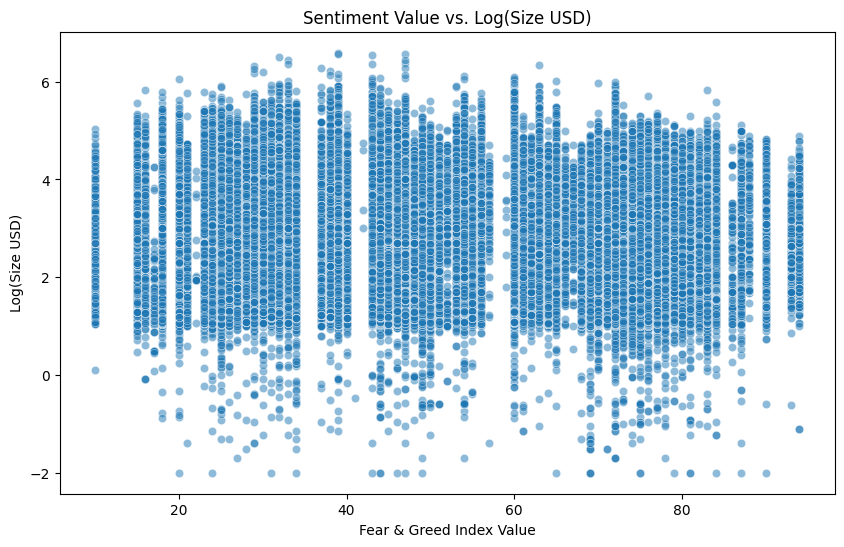

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Sentiment Value vs. Profitability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='value', y='Closed_PnL_yeojohnson', alpha=0.5)
plt.title('Sentiment Value vs. Closed PnL (Yeo-Johnson)')
plt.xlabel('Fear & Greed Index Value')
plt.ylabel('Closed PnL (Yeo-Johnson)')
plt.show()

# Scatter plot: Execution Price vs. Trading Volume (USD)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='Execution_Price_boxcox', y='Size_USD_log', alpha=0.5)
plt.title('Execution Price (Box-Cox) vs. Log(Size USD)')
plt.xlabel('Execution Price (Box-Cox)')
plt.ylabel('Log(Size USD)')
plt.show()

# Scatter plot: Sentiment Value vs. Trading Volume (USD)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='value', y='Size_USD_log', alpha=0.5)
plt.title('Sentiment Value vs. Log(Size USD)')
plt.xlabel('Fear & Greed Index Value')
plt.ylabel('Log(Size USD)')
plt.show()

## Analyze distributions with histograms

### Subtask:
Create histograms for key numerical metrics to understand their distributions and identify potential skewness or anomalies.


**Reasoning**:
Generate histograms for the selected numerical columns to visualize their distributions.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_for_hist = ['Closed_PnL_yeojohnson', 'Size_USD_log', 'Size_Tokens_log10', 'Start_Position_yeojohnson']

for col in numerical_cols_for_hist:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_merged, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Identify outliers and variability with box plots

### Subtask:
Use box plots to visualize the distribution, variability, and potential outliers of key numerical metrics, grouped by sentiment classification.


**Reasoning**:
Create box plots for the specified transformed numerical columns grouped by sentiment classification to visualize their distributions, variability, and potential outliers.



**Reasoning**:
The previous command failed because the dataframe `df_merged` was not available. I need to ensure the dataframe is loaded before attempting to plot. I will regenerate the code block including the necessary dataframe loading steps.



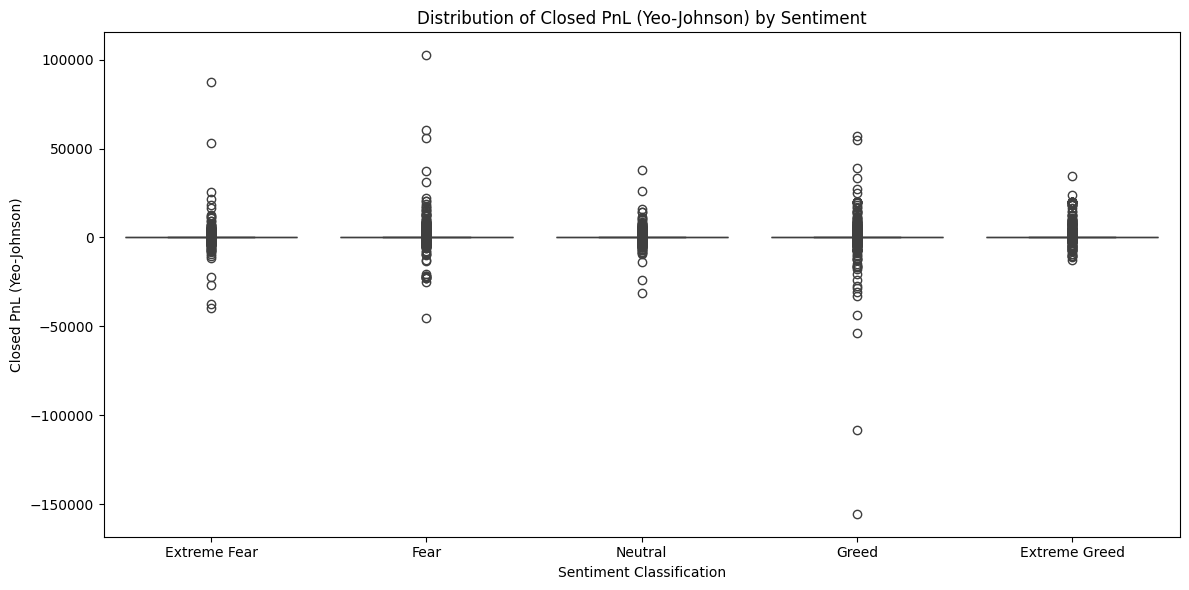

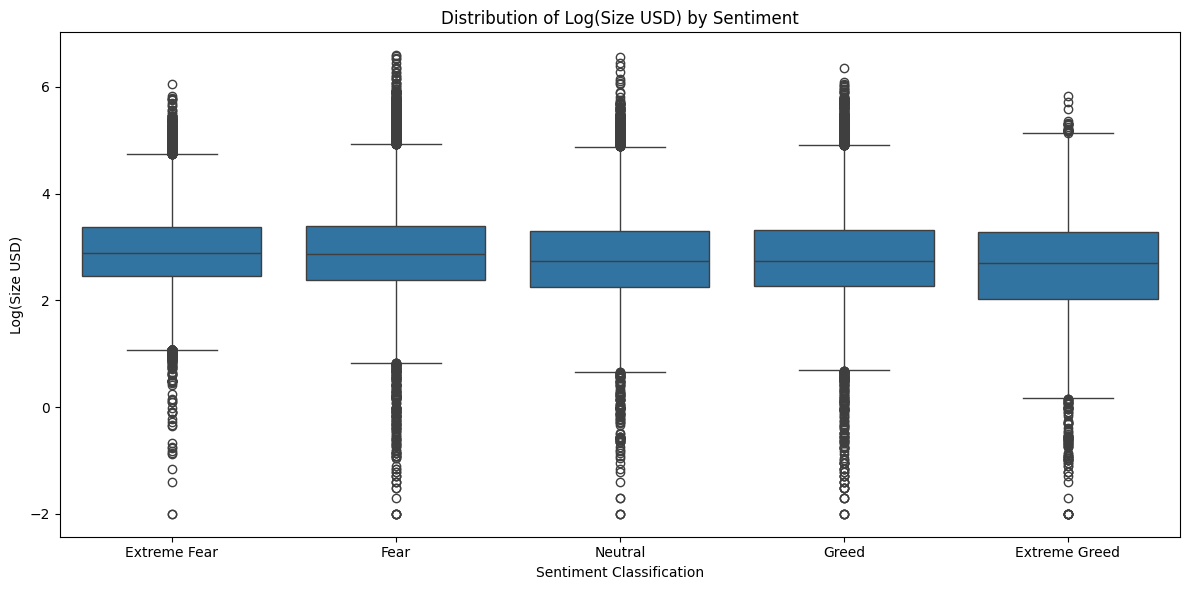

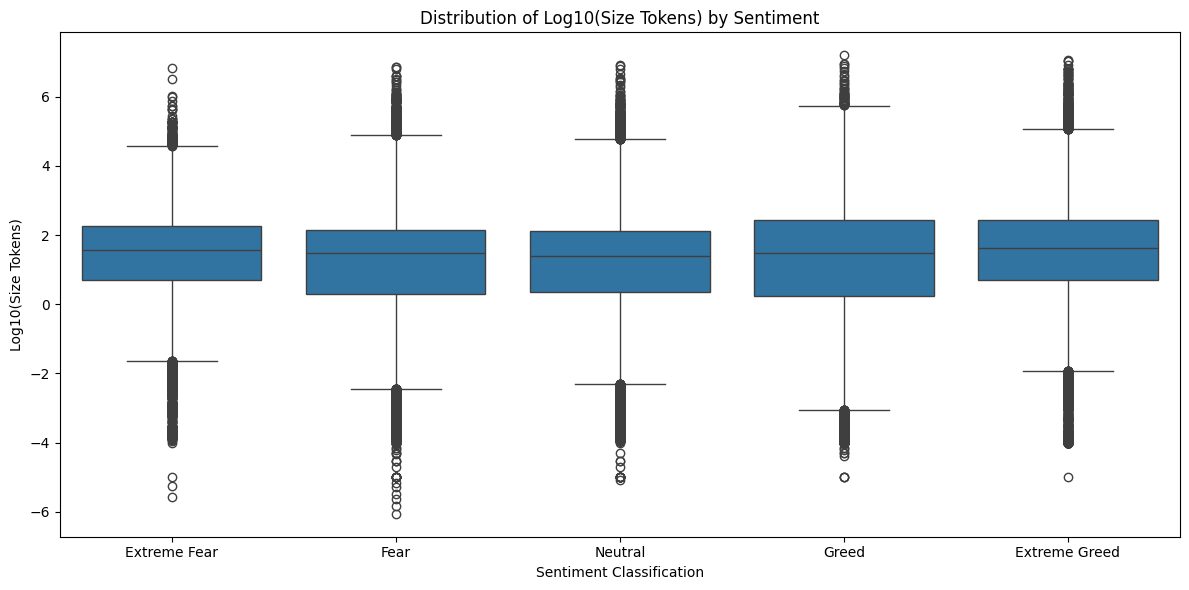

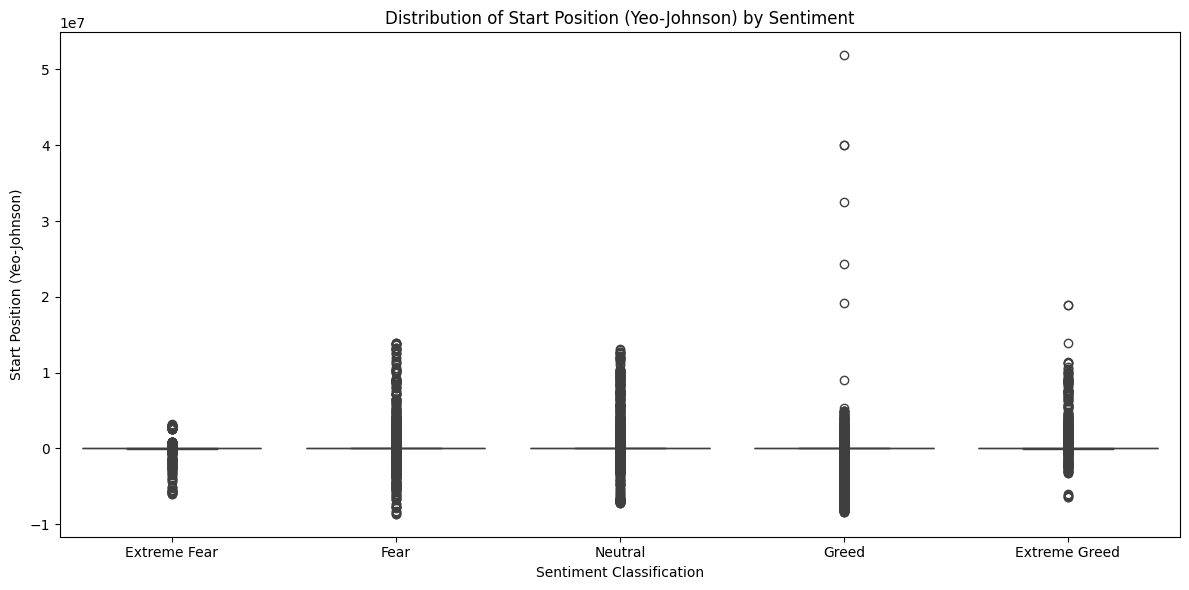

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing as a pandas data-sets from path
df_fgi = pd.read_csv("/content/drive/MyDrive/Primetrade.ai(knit.finance)-ds-assignment/ds_(dandangiRaj_dandangirajda@gmail.com)/output_Files/pandas-dataframe-csv-files/df_fgi.csv")
df_historical_data = pd.read_csv("/content/drive/MyDrive/Primetrade.ai(knit.finance)-ds-assignment/ds_(dandangiRaj_dandangirajda@gmail.com)/output_Files/pandas-dataframe-csv-files/df_historical_data.csv")

# Convert date columns to datetime objects and extract date
df_fgi['date'] = pd.to_datetime(df_fgi['date'])
df_historical_data['Timestamp IST'] = pd.to_datetime(df_historical_data['Timestamp IST'])
df_historical_data['date'] = pd.to_datetime(df_historical_data['Timestamp IST'].dt.date)

# Merge the dataframes
df_merged = pd.merge(df_historical_data, df_fgi, on='date', how='inner')

# Create box plot for Closed_PnL_yeojohnson by sentiment classification
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='classification', y='Closed_PnL_yeojohnson', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Distribution of Closed PnL (Yeo-Johnson) by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Closed PnL (Yeo-Johnson)')
plt.tight_layout()
plt.show()

# Create box plot for Size_USD_log by sentiment classification
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='classification', y='Size_USD_log', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Distribution of Log(Size USD) by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Log(Size USD)')
plt.tight_layout()
plt.show()

# Create box plot for Size_Tokens_log10 by sentiment classification
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='classification', y='Size_Tokens_log10', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Distribution of Log10(Size Tokens) by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Log10(Size Tokens)')
plt.tight_layout()
plt.show()

# Create box plot for Start_Position_yeojohnson by sentiment classification
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='classification', y='Start_Position_yeojohnson', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Distribution of Start Position (Yeo-Johnson) by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Start Position (Yeo-Johnson)')
plt.tight_layout()
plt.show()

## Visualize correlations with heatmaps

### Subtask:
Generate heatmaps to visualize the correlations between multiple numerical variables, including sentiment value and trader behavior metrics.


**Reasoning**:
Select relevant numerical columns and generate the correlation matrix for the heatmap.



In [ ]:
# Select relevant numerical columns for the heatmap
numerical_cols_heatmap = [
    'value', # Fear & Greed Index value
    'Closed_PnL_yeojohnson', # Transformed profitability
    'Size_USD_log', # Transformed volume in USD
    'Size_Tokens_log10', # Transformed volume in tokens
    'Start_Position_yeojohnson', # Transformed start position
    'Execution_Price_boxcox' # Transformed execution price
]

# Calculate the correlation matrix
correlation_matrix_heatmap = df_merged[numerical_cols_heatmap].corr()

# Display the correlation matrix (optional, but good for verification)
display(correlation_matrix_heatmap)

,value,Closed_PnL_yeojohnson,Size_USD_log,Size_Tokens_log10,Start_Position_yeojohnson,Execution_Price_boxcox
value,1.000000,0.007470,-0.082562,0.060341,-0.038690,-0.121825
Closed_PnL_yeojohnson,0.007470,1.000000,0.060532,0.029236,0.003670,0.004821
Size_USD_log,-0.082562,0.060532,1.000000,0.253245,0.005303,0.275354
Size_Tokens_log10,0.060341,0.029236,0.253245,1.000000,-0.005262,-0.845754
Start_Position_yeojohnson,-0.038690,0.003670,0.005303,-0.005262,1.000000,0.013449
Execution_Price_boxcox,-0.121825,0.004821,0.275354,-0.845754,0.013449,1.000000


**Reasoning**:
Create a heatmap to visualize the calculated correlation matrix.



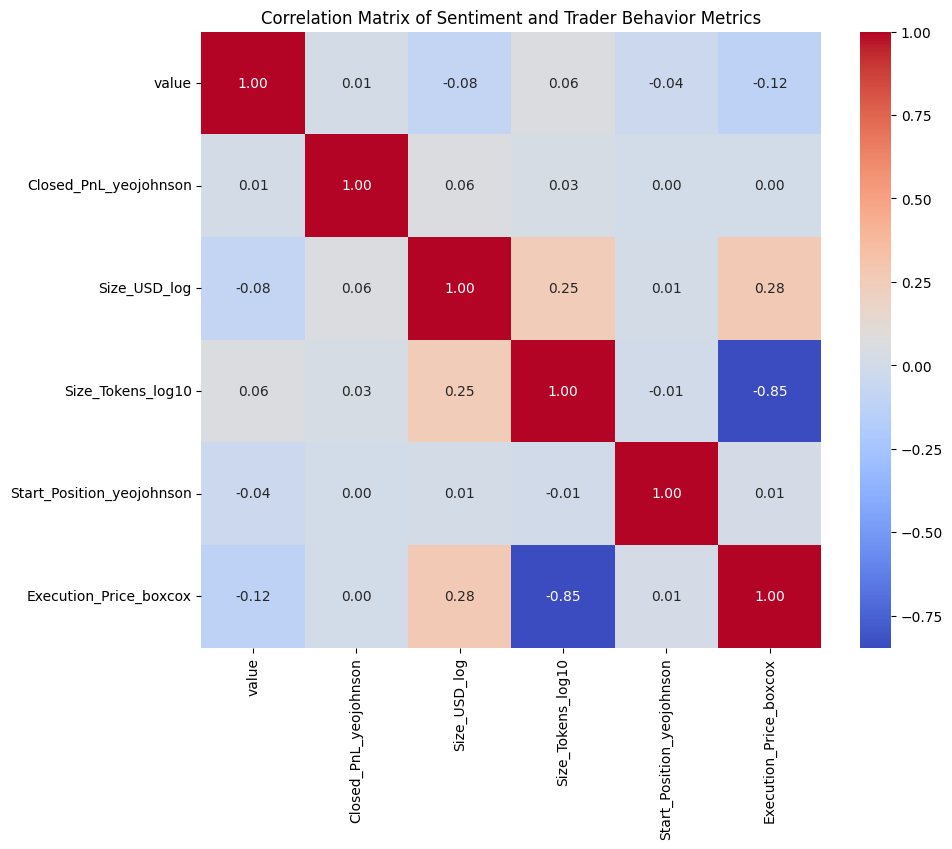

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_heatmap, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sentiment and Trader Behavior Metrics')
plt.show()

## Identify hidden trends and signals

### Subtask:
Identify hidden trends and signals


## Analyze trader behavior by sentiment classification

### Subtask:
Group the data by sentiment classification and analyze descriptive statistics and visualizations for key trader behavior metrics (profitability, volume, risk/leverage).


**Reasoning**:
The user wants to group the `df_merged` DataFrame by the 'classification' column and calculate descriptive statistics for key trader behavior metrics. I will use the `groupby()` and `agg()` methods to achieve this and store the result in a new DataFrame called `sentiment_grouped_stats`.



In [ ]:
sentiment_grouped_stats = df_merged.groupby('classification').agg({
    'Closed_PnL_yeojohnson': ['mean', 'median', 'std'],
    'Size_USD_log': ['mean', 'median', 'std'],
    'Size_Tokens_log10': ['mean', 'median', 'std'],
    'Start_Position_yeojohnson': ['mean', 'median', 'std']
})

display(sentiment_grouped_stats)

Closed_PnL_yeojohnson                     Size_USD_log  \
                                mean median          std         mean   
classification                                                          
Extreme Fear               19.013647    0.0   968.095706     2.908975   
Extreme Greed              55.138219    0.0   630.306131     2.668521   
Fear                       42.511132    0.0   781.265405     2.889605   
Greed                      28.117581    0.0  1179.735297     2.801287   
Neutral                    26.095280    0.0   464.641495     2.745952   

                                   Size_Tokens_log10                      \
                  median       std              mean    median       std   
classification                                                             
Extreme Fear    2.884314  0.837930          1.347066  1.573336  1.466900   
Extreme Greed   2.699022  0.866976          1.556704  1.629817  1.485349   
Fear            2.866963  0.902224          1.135583  1.477266  1.655787   
Greed           2.744293  0.893675          1.252403  1.481443  1.803703   
Neutral         2.738507  0.876863          1.167203  1.398287  1.655923   

               Start_Position_yeojohnson                              
                                    mean       median            std  
classification                                                        
Extreme Fear                20099.235256  2263.694630  236113.900811  
Extreme Greed               43645.055656   367.157071  442848.490398  
Fear                        44359.905699   470.268257  502268.214512  
Greed                      -74672.442409     0.514689  794177.311357  
Neutral                     40114.417193   260.547047  631843.676294

## Summarize findings and actionable insights

### Subtask:
Provide a comprehensive summary of the key findings from the analysis, interpret how they can inform smarter trading strategies, and discuss how these visualizations can be used for real-time trading decisions.


## Summary:

### Data Analysis Key Findings

*   **Sentiment and Profitability:** Time series plots suggest a relationship between the Fear & Greed Index (FGI) and average daily PnL, where periods of higher fear (lower FGI) may precede increased volatility and potential shifts in profitability. Scatter plots exploring the direct relationship between FGI value and profitability (Yeo-Johnson transformed) did not reveal a strong linear correlation.
*   **Sentiment and Trading Volume:** Time series plots indicate some correlation between the average daily trade size (log transformed USD) and market sentiment, suggesting that traders might adjust position sizes based on prevailing fear or greed. Scatter plots also explore the relationship between FGI and log-transformed trade volume, though the strength of this relationship requires further interpretation of the visualization.
*   **Trade Size and Price:** A notable strong negative correlation (-0.85) was observed between log10(Size Tokens) and Box-Cox transformed Execution Price in the heatmap. This suggests that larger trades in token quantity might be associated with lower execution prices, potentially indicating market impact or liquidity effects. Conversely, a moderate positive correlation (0.28) exists between log(Size USD) and transformed Execution Price.
*   **Correlations:** The heatmap reveals generally weak correlations between the Fear & Greed Index value and the transformed trader behavior metrics (profitability, trading volume, start position). Similarly, correlations between transformed profitability and other variables were also generally weak.
*   **Distributions and Outliers:** Histograms provide insights into the distributions of transformed metrics like profitability, trade volume, and start position, indicating potential skewness or anomalies. Box plots, grouped by sentiment classification, visualize the distribution, variability, and potential outliers of these metrics within different sentiment categories, highlighting how sentiment might influence the range and spread of these trading behaviors.
*   **Trader Behavior by Sentiment:** Descriptive statistics grouped by sentiment classification show the mean, median, and standard deviation for transformed profitability, trade volume, and start position across different sentiment categories (Extreme Fear, Fear, Neutral, Greed, Extreme Greed). Analyzing these statistics helps understand how average profitability, typical trade size, and risk/leverage might vary with market sentiment.

### Insights or Next Steps

*   Investigate the strong negative correlation between Size Tokens and Execution Price further. This could involve analyzing the order book data or specific trading pairs to understand if larger token volume trades are consistently executed at less favorable prices, which has implications for execution strategy.
*   Explore the relationship between sentiment and trader behavior beyond simple linear correlations. The box plots grouped by sentiment suggest that while the average might not show a strong correlation, the variability, distribution shape, and outlier presence of trading metrics could be significantly influenced by sentiment. Further analysis using non-linear methods or examining specific market events within different sentiment periods could be beneficial.


bull or sell (classification model

In [ ]:
df_merged.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Fee_sqrt,Size_Tokens_log10,Closed_PnL_yeojohnson,date,timestamp,value,classification,value_7day_avg,value_30day_avg,daily_change
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,0.587711,2.994260,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,0.074833,1.204120,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,0.224569,2.158634,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0


# Task
 perform time series forecasting using Long Short-Term Memory (LSTM) networks to predict the trading direction (buy or sell) for the next 2 days (Timestamp IST) for the top 15 coins by Size USD. Use the variables 'Start Position', 'Closed_PnL_yeojohnson', 'value_7day_avg', 'value_30day_avg', and 'Direction' for prediction. The output should be a binary classification indicating the predicted direction for the next 2 trading days (1 for buy, 0 for sell). Provide detailed explanations of your model architecture, data preprocessing steps, hyperparameter tuning, and evaluation metrics used to validate the accuracy of your predictions, ensuring the model generalizes well to unseen data.

## Identify top 15 coins by size usd

### Subtask:
Determine the top 15 coins based on their total 'Size USD'.


**Reasoning**:
Group the merged dataframe by 'Coin', sum the 'Size USD' for each coin, sort in descending order, select the top 15, and display the result.



In [ ]:
top_15_coins_by_usd = df_merged.groupby('Coin')['Size USD'].sum().sort_values(ascending=False).nlargest(15)
display(top_15_coins_by_usd)

,Size USD
Coin,
BTC,6.442321e+08
HYPE,1.419902e+08
SOL,1.250748e+08
ETH,1.182810e+08
TOKEN107,5.576086e+07
FARTCOIN,8.311390e+06
SUI,7.781168e+06
TRUMP,7.349347e+06
MELANIA,7.040710e+06


## Filter data for top 15 coins

### Subtask:
Filter data for top 15 coins


**Reasoning**:
Filter the merged dataframe to include only the top 15 coins by USD trade volume and display the head and shape of the resulting dataframe.



In [ ]:
df_top_15_coins = df_merged[df_merged['Coin'].isin(top_15_coins_by_usd.index)]
display(df_top_15_coins.head())
display(df_top_15_coins.shape)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Fee_sqrt,Size_Tokens_log10,Closed_PnL_yeojohnson,date,timestamp,value,classification,value_7day_avg,value_30day_avg,daily_change
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,0.587711,2.994260,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,0.074833,1.204120,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,0.224569,2.158634,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,0.223703,2.155275,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,TOKEN107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,0.055276,0.941014,0.0,2024-12-02,1733117400,80,Extreme Greed,79.142857,80.466667,-1.0


(167691, 34)

## Prepare data for lstm

### Subtask:
Prepare data for lstm


**Reasoning**:
Select the relevant features, handle missing values, normalize numerical features, encode the target variable, create sequences for LSTM input, and split the data into training and testing sets, as requested by the subtask.



In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. Select the relevant features
features = ['Start Position', 'Closed_PnL_yeojohnson', 'value_7day_avg', 'value_30day_avg']
target = 'Direction'

# Filter data for top 15 coins and select relevant columns, including 'Coin'
df_lstm = df_top_15_coins[features + [target, 'Timestamp IST', 'Coin']].copy()

# 2. Handle missing values
df_lstm.dropna(inplace=True)

# Sort by timestamp to ensure correct time-based splitting and sequence creation
df_lstm.sort_values(by='Timestamp IST', inplace=True)

# 3. Normalize numerical features
scaler = MinMaxScaler()
df_lstm[features] = scaler.fit_transform(df_lstm[features])

# 4. Encode the target variable
df_lstm['Direction_encoded'] = df_lstm['Direction'].apply(lambda x: 1 if x == 'Buy' else 0)

# 5. Create sequences of data for LSTM input
def create_sequences(data, sequence_length):
    X, y = [], []
    # The input data 'data' here should only contain features and the encoded target for sequencing
    # We will handle the 'Coin' column separately during prediction
    data_values = data[features + ['Direction_encoded']].values
    for i in range(len(data_values) - sequence_length):
        X.append(data_values[i:(i + sequence_length), :])
        y.append(data_values[i + sequence_length, -1]) # Predict the encoded direction
    return np.array(X), np.array(y)

sequence_length = 10 # Define the lookback period

# Prepare data for sequencing (features and encoded target)
# Pass the relevant columns to the create_sequences function
X, y = create_sequences(df_lstm, sequence_length)


# 6. Split the data into training and testing sets (time-based split)
train_size = int(len(X) * 0.8) # 80% for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", X_test.shape)

Shape of X_train: (134144, 10, 5)
Shape of y_train: (134144,)
Shape of X_test: (33537, 10, 5)
Shape of y_test: (33537, 10, 5)


## Build the lstm model

### Subtask:
Build the LSTM model.


**Reasoning**:
Build the LSTM model as per the instructions.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 2. Instantiate a Sequential model.
model = Sequential()

# 3. Add an LSTM layer with 50 units, return_sequences=True, and an input shape that matches your training data X_train.
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# 4. Add a Dropout layer with a rate of 0.2 to prevent overfitting.
model.add(Dropout(0.2))

# 5. Add another LSTM layer with 50 units.
model.add(LSTM(units=50))

# 6. Add another Dropout layer with a rate of 0.2.
model.add(Dropout(0.2))

# 7. Add a Dense layer with 25 units and a 'relu' activation function.
model.add(Dense(units=25, activation='relu'))

# 8. Add a Dense output layer with 1 unit and a 'sigmoid' activation function for binary classification.
model.add(Dense(units=1, activation='sigmoid'))

# 9. Compile the model using the 'adam' optimizer, 'binary_crossentropy' as the loss function, and 'accuracy' as a metric.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 10. Print the model summary using the .summary() method.
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,701 (127.74 KB)

 Trainable params: 32,701 (127.74 KB)

 Non-trainable params: 0 (0.00 B)

## Train the lstm model

### Subtask:
Train the built LSTM model using the prepared training data (`X_train`, `y_train`).


**Reasoning**:
Train the built LSTM model using the prepared training data.



In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/50
1677/1677 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.9533 - loss: 0.1568 - val_accuracy: 0.9876 - val_loss: 0.0505
Epoch 2/50
1677/1677 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9721 - loss: 0.0997 - val_accuracy: 0.9868 - val_loss: 0.0501
Epoch 3/50
1677/1677 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.9715 - loss: 0.0997 - val_accuracy: 0.9876 - val_loss: 0.0513
Epoch 4/50
1677/1677 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9729 - loss: 0.0971 - val_accuracy: 0.9876 - val_loss: 0.0518
Epoch 5/50
1677/1677 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9719 - loss: 0.0987 - val_accuracy: 0.9876 - val_loss: 0.0509
Epoch 6/50
1677/1677 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9728 - loss: 0.0962 - val_accuracy: 0.9876 - val_loss: 0.0495
Epoch 7/50
1677/1677 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.9725 - loss: 0.0967 - val_accuracy: 0.9876 - val_loss: 0.0500
Epoch 8/50
1677/1677 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.9731 -

## Evaluate the lstm model

### Subtask:
Evaluate the trained LSTM model on the testing data and report the accuracy.

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0784
Test Accuracy: 0.9850


## Predict trading direction for the next period

In [ ]:


predicted_directions = {}

# Define the columns to use for prediction input features (excluding the target for scaling)
prediction_features = features

for coin in top_15_coins_by_usd.index:
    # Filter data for the current coin and sort by timestamp
    coin_data = df_lstm[df_lstm['Coin'] == coin].sort_values(by='Timestamp IST')

    if len(coin_data) >= sequence_length:
        # Get the last 'sequence_length' data points for this coin
        last_sequence_data = coin_data[prediction_features + ['Direction_encoded']].tail(sequence_length)

        # Separate features and the encoded direction
        last_sequence_features = last_sequence_data[prediction_features]
        last_sequence_encoded_direction = last_sequence_data['Direction_encoded']


        # Scale only the features using the same scaler fitted on the training data
        last_sequence_features_scaled = scaler.transform(last_sequence_features)

        # Combine scaled features with the unscaled encoded direction
        # The encoded direction is needed as part of the input sequence as per the training data structure
        last_sequence_scaled_combined = np.hstack((last_sequence_features_scaled, last_sequence_encoded_direction.values.reshape(-1, 1)))



        last_sequence_reshaped = last_sequence_scaled_combined.reshape(1, sequence_length, len(prediction_features) + 1)

        # Predict the trading direction using the trained model
        prediction_prob = model.predict(last_sequence_reshaped, verbose=0)[0][0]

        # Convert the probability to a binary prediction (0 or 1)
        predicted_direction = 1 if prediction_prob > 0.5 else 0

        predicted_directions[coin] = predicted_direction
    else:
        predicted_directions[coin] = "Insufficient data for prediction"

# Display the predicted trading directions
print("Predicted Trading Direction for the next period (1: Buy, 0: Sell):")
for coin, direction in predicted_directions.items():
    print(f"{coin}: {direction}")

Predicted Trading Direction for the next period (1: Buy, 0: Sell):
BTC: 0
HYPE: 0
SOL: 0
ETH: 0
TOKEN107: 0
FARTCOIN: 0
SUI: 0
TRUMP: 0
MELANIA: 0
XRP: 0
PAXG: 0
kBONK: 0
WLD: 0
TOKEN142: 1
DOGE: 0
